# YSB

# About the Data
### This dataset reflects the operational and procurement activity of YSB, an Israeli infrastructure company. 
It includes records of inventory movements, supplier orders, goods receipts, customer orders, and year-end inventory valuation (as of December 31, 2024).
The data was collected from internal company systems and covers the period from January to August 2025, enabling analysis of project-level performance, procurement efficiency, and inventory management.


# Column Descriptions for YSB Operations Dataset

1. **Date** ‚Äì Date of the transaction or record.
2. **Inventory Movement Type** ‚Äì Type of inventory action (e.g., supplier receipt, internal transfer).
3. **Document Number** ‚Äì Reference number of invoice or delivery note.
4. **Item Code** ‚Äì Unique product or material identifier (◊û◊ß"◊ò).
5. **Item Description** ‚Äì Description of the item received, moved, or ordered.
6. **Quantity** ‚Äì Number of units involved in the transaction.
7. **Unit of Measure** ‚Äì Unit used (e.g., units, kg, meters).
8. **Unit Cost (ILS)** ‚Äì Cost per unit in Israeli Shekels.
9. **Total Cost (ILS)** ‚Äì Total cost of the transaction in ILS.
10. **Final Price** ‚Äì Final agreed price in purchase orders.
11. **Base Price** ‚Äì Standard price before discounts or negotiations.
12. **Supplier Name** ‚Äì Name of the supplier.
13. **Supplier ID** ‚Äì Unique identifier for the supplier.
14. **Customer Name** ‚Äì Name of the client or project owner.
15. **Customer ID** ‚Äì Unique customer identifier.
16. **Project Code** ‚Äì Internal code representing a project.
17. **Project Description** ‚Äì Description or name of the infrastructure project.
18. **Order Number** ‚Äì Purchase or sales order reference.
19. **Order Status** ‚Äì Indicates whether the order is completed or open.
20. **Inventory Value** ‚Äì Calculated value of items in stock.
21. **Warehouse / Location** ‚Äì Where the inventory is stored or delivered.
22. **Delivery Date** ‚Äì Date of actual or planned goods receipt.
23. **Product Version / BOM** ‚Äì Version of the product or Bill of Materials.
24. **Signature / Timestamp** ‚Äì User and time the action was recorded in the system.


<div>
<img src="https://raw.githubusercontent.com/NirAvrahamoff/ysb-operations-analysis/main/ChatGPT%20Image%20Aug%2017%2C%202025%2C%2007_06_53%20PM.png" width="700"/>
</div>


In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [200]:
# ◊ß◊®◊ô◊ê◊î ◊©◊ú ◊õ◊ú ◊ß◊ï◊ë◊• ◊ú-DataFrame
inventory_jan_apr = pd.read_csv("inventory_movements_jan_apr_2025.csv")
inventory_apr_on = pd.read_csv("inventory_movements_apr_on_2025.csv")
supplier_orders = pd.read_csv("supplier_orders_2025.csv")
goods_receipts = pd.read_csv("supplier_goods_receipts_2025.csv")
customer_orders = pd.read_csv("customer_orders_2025.csv")
inventory_valuation = pd.read_csv("inventory_valuation_2024_12_31.csv")

# ◊©◊û◊ô◊®◊î ◊ë◊û◊ô◊ú◊ï◊ü ◊ú◊¶◊ï◊®◊ö ◊í◊ô◊©◊î ◊†◊ï◊ó◊î
data_dict = {
    "Inventory Jan-Apr": inventory_jan_apr,
    "Inventory Apr-On": inventory_apr_on,
    "Supplier Orders": supplier_orders,
    "Goods Receipts": goods_receipts,
    "Customer Orders": customer_orders,
    "Inventory Valuation Dec 31 2024": inventory_valuation
}

# ◊î◊¶◊í◊™ ◊°◊ô◊õ◊ï◊ù ◊©◊ú ◊õ◊ú ◊î◊ò◊ë◊ú◊ê◊ï◊™
summary = {}
for name, df in data_dict.items():
    summary[name] = {
        "Rows": df.shape[0],
        "Columns": df.shape[1],
        "Missing Values": df.isnull().sum().sum()
    }

summary_df = pd.DataFrame(summary).T
print("Dataset Overview:")
print(summary_df)

# ◊î◊¶◊í◊î ◊©◊ú 5 ◊©◊ï◊®◊ï◊™ ◊®◊ê◊©◊ï◊†◊ï◊™ ◊û◊õ◊ú ◊ò◊ë◊ú◊î (◊ú◊ë◊ì◊ô◊ß◊î)
for name, df in data_dict.items():
    print(f"\n--- {name} ---")
    print(df.head())


Dataset Overview:
                                 Rows  Columns  Missing Values
Inventory Jan-Apr                8819       43          145440
Inventory Apr-On                 4937       43           79763
Supplier Orders                  1977       12               6
Goods Receipts                   1532       14              11
Customer Orders                  7279       39           60112
Inventory Valuation Dec 31 2024  8186        7            5814

--- Inventory Jan-Apr ---
      ◊™◊ê◊®◊ô◊ö    ◊°◊ï◊í ◊™◊†◊ï◊¢◊™ ◊û◊ú◊ê◊ô ◊û◊°. ◊™◊¢◊ï◊ì◊î/◊ó◊©◊ë◊ï◊†◊ô◊™      ◊û◊ß"◊ò  \
0  1/2/2025  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß        GR25000010  26000051   
1  1/2/2025  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß        GR25000010  26000862   
2  1/2/2025  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß        GR25000010  26000912   
3  1/2/2025  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß        GR25000011  19001084   
4  1/2/2025  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß        GR25000012  34000166   

                                ◊™◊ê◊ï◊® ◊û

In [201]:
for name, df in data_dict.items():
    print(f"\n===== {name} =====")
    print(f"Shape: {df.shape[0]} rows √ó {df.shape[1]} columns")
    print("Column Names:", list(df.columns))
    print("Missing Values:\n", df.isnull().sum().sort_values(ascending=False).head(10))
    print("Data Types:\n", df.dtypes.value_counts())

missing_summary = {}
for name, df in data_dict.items():
    missing_summary[name] = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame(missing_summary).T
print("\n% Missing Values per Table:")
print(missing_df)

for name, df in data_dict.items():
    print(f"\n=== Checking {name} ===")
    numeric_cols = df.select_dtypes(include=["number"]).columns
    if len(numeric_cols) > 0:
        print(df[numeric_cols].describe().T)
    else:
        print("No numeric columns")

# --- ◊©◊ú◊ë 4: ◊©◊û◊ô◊®◊™ ◊°◊ô◊õ◊ï◊ù ◊ú◊ß◊ï◊ë◊• ---
missing_df.to_csv("missing_values_summary.csv", encoding="utf-8-sig")
print("\nüìÅ File 'missing_values_summary.csv' saved.")



===== Inventory Jan-Apr =====
Shape: 8819 rows √ó 43 columns
Column Names: ['◊™◊ê◊®◊ô◊ö', '◊°◊ï◊í ◊™◊†◊ï◊¢◊™ ◊û◊ú◊ê◊ô', '◊û◊°. ◊™◊¢◊ï◊ì◊î/◊ó◊©◊ë◊ï◊†◊ô◊™', '◊û◊ß"◊ò', '◊™◊ê◊ï◊® ◊û◊ï◊¶◊®', '◊õ◊û◊ï◊™ (◊ß◊†◊ô◊î/◊û◊õ◊ô◊®◊î)', '◊¢◊ú◊ï◊™ ◊©"◊ó ◊ú◊ô◊ó\' ◊ß/◊û', '◊¢◊ú◊ï◊™ ◊©"◊ó', '◊û◊ß◊ï◊® ◊¢◊ú◊ï◊™', "◊û◊°' ◊ú◊ß◊ï◊ó", '◊©◊ù ◊ú◊ß◊ï◊ó', "◊û◊°' ◊°◊§◊ß", '◊©◊ù ◊°◊§◊ß', '◊û◊ó◊°◊ü', '◊ê◊ô◊™◊ï◊®', '◊§◊ß"◊¢/◊û◊†◊î', '◊û◊î◊ì◊ï◊®◊™ ◊û◊ï◊¶◊®', '◊û◊î◊ì◊ï◊®◊™ ◊¢◊• ◊û◊ï◊¶◊®', "◊ô◊ó' ◊ß◊†◊ô◊î/◊û◊õ◊ô◊®◊î", '◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú', "◊ô◊ó' ◊û◊§◊¢◊ú", "◊¢◊ú◊ï◊™ USD ◊ú◊ô◊ó' ◊ß/◊û", '◊¢◊ú◊ï◊™ USD', '◊û◊ò◊ë◊¢ ◊™◊†◊ï◊¢◊î', '◊ú◊û◊ó◊°◊ü', '◊ú◊ê◊ô◊™◊ï◊®', '◊ú◊û◊ß"◊ò', '◊™◊ê◊ï◊® ◊û◊ï◊¶◊®.1', '◊ú◊§◊ß"◊¢/◊û◊†◊î', '◊û◊î◊ì◊ï◊®◊™ ◊¢◊• ◊û◊ï◊¶◊®.1', '◊û◊°◊ò◊ò◊ï◊°', '◊ú◊°◊ò◊ò◊ï◊°', '◊û◊§◊¢◊ï◊ú◊î/◊û◊©◊ò◊ó', '◊ú◊§◊¢◊ï◊ú◊î/◊û◊©◊ò◊ó', '◊¢◊ë◊ï◊® ◊§◊ß"◊¢', '◊¢◊ë◊ï◊® ◊û◊ß"◊ò', '◊™◊ê◊ï◊® ◊û◊ï◊¶◊®.2', '◊¢◊ë◊ï◊® ◊§◊¢◊ï◊ú◊î/◊û◊©◊ò◊ó', '◊û◊°. ◊ê◊®◊ô◊ñ◊ï◊™', '◊ß◊ï◊ì ◊°◊ï◊í ◊ê◊®◊ô◊ñ◊î', '◊™◊ê◊ï◊® ◊°◊ï◊í ◊ê◊®◊ô◊ñ◊î', '◊ó◊™◊ô◊û◊î', '◊™. ◊ó◊™◊ô◊û◊î

In [202]:
#◊ê◊ô◊ó◊ï◊ì ◊ú◊©◊†◊î ◊©◊ú◊û◊î
inventory_movements = pd.concat([inventory_jan_apr, inventory_apr_on], ignore_index=True)


In [203]:
# ◊ë◊ì◊ï◊ß ◊ê◊™ ◊©◊û◊ï◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊ë◊©◊™◊ô ◊î◊ò◊ë◊ú◊ê◊ï◊™
print("== Orders Columns ==")
print(orders.columns.tolist())

print("\n== Receipts Columns ==")
print(receipts.columns.tolist())

== Orders Columns ==
["◊û◊°' ◊°◊§◊ß", '◊©◊ù ◊°◊§◊ß', '◊î◊ñ◊û◊†◊î', '◊™◊ê◊®◊ô◊ö', "◊û◊ß'◊ò", '◊™◊ê◊ï◊® ◊û◊ï◊¶◊®', '◊™. ◊ê◊°◊§◊ß◊î', '◊õ◊û◊ï◊™', "◊ô◊ó'", '◊û◊ó◊ô◊® ◊°◊ï◊§◊ô', '◊û◊ò◊ë◊¢', '◊û◊ó◊ô◊® ◊°◊ï◊§◊ô ◊ë◊©◊ß◊ú◊ô◊ù']

== Receipts Columns ==
['◊™◊ê◊®◊ô◊ö', "◊û◊ß'◊ò", '◊™◊ê◊ï◊® ◊û◊ï◊¶◊®', '◊õ◊û◊ï◊™', "◊ô◊ó'", '◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú', "◊ô◊ó' ◊û◊§◊¢◊ú", '◊™◊¢◊ï◊ì◊î', '◊°◊ï◊í ◊™◊¢◊ï◊ì◊î', '◊ú◊û◊ó◊°◊ü', '◊ê◊ô◊™◊ï◊®', '◊î◊ñ◊û◊†◊î', "◊û◊°' ◊°◊§◊ß", '◊©◊ù ◊°◊§◊ß']


In [204]:
orders = pd.read_csv("supplier_orders_2025.csv")
receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

orders.columns = orders.columns.str.strip()
receipts.columns = receipts.columns.str.strip()

for df in [orders, receipts]:
    df["◊û◊ß'◊ò"] = df["◊û◊ß'◊ò"].astype(str)
    df["◊û◊°' ◊°◊§◊ß"] = df["◊û◊°' ◊°◊§◊ß"].astype(str)
    df["◊î◊ñ◊û◊†◊î"] = df["◊î◊ñ◊û◊†◊î"].astype(str)

joined = orders.merge(receipts, on=["◊û◊ß'◊ò", "◊û◊°' ◊°◊§◊ß", "◊î◊ñ◊û◊†◊î"], how='left', indicator=True)

match_rate = (joined['_merge'] == 'both').mean()
print(f"üìä Match rate: {match_rate:.2%}")

missing_rate = joined['◊™◊ê◊®◊ô◊ö_y'].isna().mean()
print(f"‚ùå Missing '◊™◊ê◊®◊ô◊ö' after join: {missing_rate:.2%}")

dupes = joined.duplicated(subset=["◊î◊ñ◊û◊†◊î", "◊û◊ß'◊ò", "◊û◊°' ◊°◊§◊ß"], keep=False)
print(f"‚ö†Ô∏è Duplicated join rows: {dupes.mean():.2%}")


üìä Match rate: 74.32%
‚ùå Missing '◊™◊ê◊®◊ô◊ö' after join: 25.68%
‚ö†Ô∏è Duplicated join rows: 41.93%


In [205]:
inventory_summary = inventory_movements.groupby(["◊û◊ß\"◊ò", "◊™◊ê◊ï◊® ◊û◊ï◊¶◊®"]).agg({
    "◊õ◊û◊ï◊™ (◊ß◊†◊ô◊î/◊û◊õ◊ô◊®◊î)": "sum",
    "◊¢◊ú◊ï◊™ ◊©\"◊ó": "sum"
}).rename(columns={"◊õ◊û◊ï◊™ (◊ß◊†◊ô◊î/◊û◊õ◊ô◊®◊î)": "◊™◊†◊ï◊¢◊î ◊†◊ò◊ï", "◊¢◊ú◊ï◊™ ◊©\"◊ó": "◊¢◊ú◊ï◊™ ◊õ◊ï◊ú◊ú◊™"})

inventory_summary.head()

◊™◊†◊ï◊¢◊î ◊†◊ò◊ï  ◊¢◊ú◊ï◊™ ◊õ◊ï◊ú◊ú◊™
◊û◊ß"◊ò ◊™◊ê◊ï◊® ◊û◊ï◊¶◊®                                                                
000  ◊ê◊ú◊ß◊ò◊®◊ï◊ì◊ï◊™ 316L 2.5 ◊û◊û - ◊†◊ú◊ß◊ó ◊¢◊ô◊ì◊ï ◊ë◊ê◊ô◊©◊ï◊® ◊®◊ï◊ü ◊û◊©...        2.0         0.0
     ◊î◊™◊ß◊†◊™ ◊û◊ó◊°◊ï◊ù ◊û◊ò◊ë◊ó - 250250952                              1.0         0.0
     ◊ô◊™◊®◊î 60% ◊ú◊î◊©◊ú◊û◊™ ◊ê◊ë◊ü ◊ì◊®◊ö 2 ◊®◊õ◊© ◊û◊™◊ß◊ü ◊°◊ë◊ô◊ì◊ï◊®                 1.0         0.0
     ◊û◊ß◊ì◊ó ◊û◊ï◊©◊ó◊ñ 13+9+5 ◊¢◊ï◊í◊ü ◊í'◊û◊ë◊ï ◊ï◊ë◊ï◊®◊í ◊ê◊ú◊ü ◊õ◊ô◊°◊ï◊ô ◊ó-...        1.0         0.0
     ◊§◊ú◊ô◊ô◊® ◊ò◊ë◊¢◊ï◊™ 12" + 13" - ◊õ◊ô◊°◊ï◊ô ◊û◊©◊ú◊ï◊ó 12017                 1.0         0.0

In [206]:
def to_datetime_safe(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], format="%Y-%m-%d", errors='coerce')
    return df

In [207]:
def to_datetime_safe(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], format="%Y-%m-%d", errors='coerce')
    return df

def drop_all_null_cols(df):
    """Removes columns that are completely empty."""
    before = df.shape[1]
    df2 = df.dropna(axis=1, how='all')
    removed = before - df2.shape[1]
    return df2, removed


def to_numeric_safe(df, cols):
    """Converts given columns to numeric, cleaning currency and non-numeric symbols."""
    for c in cols:
        if c in df.columns:
            if df[c].dtype == 'object':
                df[c] = (
                    df[c]
                    .astype(str)
                    .str.replace(r'[\u20AA$,‚Ç™‚Ç¨¬£]', '', regex=True)
                    .str.replace(r'[^\d\.\-]', '', regex=True)
                )
            df[c] = pd.to_numeric(df[c], errors='coerce')
    return df

def normalize_item_code(series):
    """Keeps only digits in item codes."""
    return series.astype(str).str.replace(r'\D', '', regex=True)

def apply_item_code_normalization(df, col_candidates):
    for col in col_candidates:
        if col in df.columns:
            df['item_code_norm'] = normalize_item_code(df[col])
            break
    return df


inv_a = pd.read_csv("inventory_movements_jan_apr_2025.csv")
inv_b = pd.read_csv("inventory_movements_apr_on_2025.csv")
po    = pd.read_csv("supplier_orders_2025.csv")
gr    = pd.read_csv("supplier_goods_receipts_2025.csv")
so    = pd.read_csv("customer_orders_2025.csv")
ival  = pd.read_csv("inventory_valuation_2024_12_31.csv")


for name, df in zip(
    ["Inventory Jan-Apr", "Inventory Apr-On", "Supplier Orders", "Goods Receipts", "Customer Orders", "Inventory Valuation"],
    [inv_a, inv_b, po, gr, so, ival]):
    cleaned, _ = drop_all_null_cols(df)
    if name == "Inventory Jan-Apr":
        inv_a = cleaned
    elif name == "Inventory Apr-On":
        inv_b = cleaned
    elif name == "Supplier Orders":
        po = cleaned
    elif name == "Goods Receipts":
        gr = cleaned
    elif name == "Customer Orders":
        so = cleaned
    elif name == "Inventory Valuation":
        ival = cleaned


inv_a = to_datetime_safe(inv_a, ['◊™◊ê◊®◊ô◊ö', '◊™. ◊ó◊™◊ô◊û◊î'])
inv_b = to_datetime_safe(inv_b, ['◊™◊ê◊®◊ô◊ö', '◊™. ◊ó◊™◊ô◊û◊î'])
po    = to_datetime_safe(po, ['◊™◊ê◊®◊ô◊ö', '◊™. ◊ê◊°◊§◊ß◊î'])
gr    = to_datetime_safe(gr, ['◊™◊ê◊®◊ô◊ö'])
so    = to_datetime_safe(so, ['◊™◊ê◊®◊ô◊ö', '◊™. ◊ê◊°◊§◊ß◊î'])


inv_numeric_cols = [
    '◊õ◊û◊ï◊™ (◊ß◊†◊ô◊î/◊û◊õ◊ô◊®◊î)', '◊¢◊ú◊ï◊™ ◊©"◊ó', '◊¢◊ú◊ï◊™ USD',
    '◊¢◊ú◊ï◊™ ◊©"◊ó ◊ú◊ô◊ó\' ◊ß/◊û', '◊¢◊ú◊ï◊™ USD ◊ú◊ô◊ó\' ◊ß/◊û', '◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú'
]
inv_a = to_numeric_safe(inv_a, inv_numeric_cols)
inv_b = to_numeric_safe(inv_b, inv_numeric_cols)

po = to_numeric_safe(po, ['◊õ◊û◊ï◊™', '◊û◊ó◊ô◊® ◊°◊ï◊§◊ô', '◊û◊ó◊ô◊® ◊°◊ï◊§◊ô ◊ë◊©◊ß◊ú◊ô◊ù'])
gr = to_numeric_safe(gr, ['◊õ◊û◊ï◊™', '◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú'])
so = to_numeric_safe(so, [
    '◊û◊ó◊ô◊® ◊û◊ô◊†◊ô◊û◊ï◊ù','◊û◊ó◊ô◊®◊ï◊ü ◊ë◊°◊ô◊° ◊©"◊ó','◊û◊ó◊ô◊® ◊ë◊™◊¢◊ï◊ì◊î ◊©"◊ó','◊û◊ó◊ô◊®◊ï◊ü ◊ë◊°◊ô◊° USD','◊û◊ó◊ô◊® ◊ë◊™◊¢◊ï◊ì◊î USD',
    '◊û◊ó◊ô◊®◊ï◊ü ◊ë◊°◊ô◊°','◊û◊ó◊ô◊® ◊ë◊™◊¢◊ï◊ì◊î','◊õ◊û◊ï◊™','◊°◊î"◊õ ◊ë-◊©"◊ó','◊°◊î"◊õ ◊ë-USD',
    '◊°◊î"◊õ ◊ë◊û◊ò◊ë◊¢ ◊î◊ñ◊û◊†◊î','◊°◊î"◊õ ◊ê◊ó◊®◊ô ◊î◊†◊ó◊î','◊ô◊™◊®◊î ◊ú◊ê◊°◊§◊ß◊î'
])
ival = to_numeric_safe(ival, ['◊û◊ó◊ô◊® ◊ê◊ó◊®◊ï◊ü ◊©◊ó◊ï◊©◊ë', '◊õ◊û◊ï◊™', '◊¢◊®◊ö ◊û◊ú◊ê◊ô'])

# ==== 5) Normalize Item Code ====

inv_a = apply_item_code_normalization(inv_a, ['◊û◊ß"◊ò', "◊û◊ß'◊ò"])
inv_b = apply_item_code_normalization(inv_b, ['◊û◊ß"◊ò', "◊û◊ß'◊ò"])
po    = apply_item_code_normalization(po, ["◊û◊ß'◊ò"])
gr    = apply_item_code_normalization(gr, ["◊û◊ß'◊ò"])
so    = apply_item_code_normalization(so, ['◊û◊ß"◊ò', "◊û◊ß'◊ò"])
ival  = apply_item_code_normalization(ival, ['◊ß◊ï◊ì ◊§◊®◊ô◊ò'])


common_cols = list(set(inv_a.columns).intersection(set(inv_b.columns)))
inv_all = pd.concat([inv_a[common_cols], inv_b[common_cols]], ignore_index=True)

def classify_direction(s):
    s = str(s)
    if '◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î' in s or '◊õ◊†◊ô◊°◊î' in s or '◊ß◊ë◊ú◊î' in s:
        return 'in'
    if '◊î◊ó◊ñ◊®◊î' in s or '◊î◊ï◊¶◊ê◊™' in s or '◊û◊õ◊ô◊®◊î' in s:
        return 'out'
    if '◊î◊¢◊ë◊®◊î' in s:
        return 'transfer'
    return 'other'

if '◊°◊ï◊í ◊™◊†◊ï◊¢◊™ ◊û◊ú◊ê◊ô' in inv_all.columns:
    inv_all['direction'] = inv_all['◊°◊ï◊í ◊™◊†◊ï◊¢◊™ ◊û◊ú◊ê◊ô'].apply(classify_direction)
else:
    inv_all['direction'] = 'other'

# Signed quantity for '◊õ◊û◊ï◊™_◊†◊ò◊ï'
if '◊õ◊û◊ï◊™ (◊ß◊†◊ô◊î/◊û◊õ◊ô◊®◊î)' in inv_all.columns:
    qty = inv_all['◊õ◊û◊ï◊™ (◊ß◊†◊ô◊î/◊û◊õ◊ô◊®◊î)'].copy()
    qty = np.where((inv_all['direction'] == 'out') & (qty > 0), -qty, qty)
    inv_all['◊õ◊û◊ï◊™_◊†◊ò◊ï'] = qty


inv_all.to_csv("clean_inventory_movements_2025.csv", index=False, encoding="utf-8-sig")
po.to_csv("clean_supplier_orders_2025.csv", index=False, encoding="utf-8-sig")
gr.to_csv("clean_goods_receipts_2025.csv", index=False, encoding="utf-8-sig")
so.to_csv("clean_customer_orders_2025.csv", index=False, encoding="utf-8-sig")
ival.to_csv("clean_inventory_valuation_2024_12_31.csv", index=False, encoding="utf-8-sig")

print("‚úÖ All cleaned files saved to disk.")


‚úÖ All cleaned files saved to disk.


In [208]:
# ◊°◊ô◊†◊ï◊ü ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊™◊ê◊®◊ô◊ö ◊™◊ß◊ô◊ü ◊ë◊î◊ñ◊û◊†◊ï◊™
po_lead = po[['◊î◊ñ◊û◊†◊î', 'item_code_norm', '◊™◊ê◊®◊ô◊ö']].dropna()

# ◊°◊ô◊†◊ï◊ü ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊™◊ê◊®◊ô◊ö ◊™◊ß◊ô◊ü ◊ë◊ß◊ë◊ú◊ï◊™
gr_lead = gr[['◊î◊ñ◊û◊†◊î', 'item_code_norm', '◊™◊ê◊®◊ô◊ö']].dropna()

# ◊û◊ô◊ñ◊ï◊í ◊ë◊ô◊ü ◊î◊î◊ñ◊û◊†◊ï◊™ ◊ï◊î◊ß◊ë◊ú◊ï◊™ ◊ú◊§◊ô ◊î◊ñ◊û◊†◊î ◊ï◊û◊ß"◊ò
lead_df = pd.merge(
    po_lead.rename(columns={'◊™◊ê◊®◊ô◊ö': '◊™◊ê◊®◊ô◊ö_◊î◊ñ◊û◊†◊î'}),
    gr_lead.rename(columns={'◊™◊ê◊®◊ô◊ö': '◊™◊ê◊®◊ô◊ö_◊ß◊ë◊ú◊î'}),
    on=['◊î◊ñ◊û◊†◊î', 'item_code_norm'],
    how='inner'
)

# ◊ó◊ô◊©◊ï◊ë ◊ñ◊û◊ü ◊ê◊°◊§◊ß◊î ◊ë◊§◊ï◊¢◊ú ◊ë◊û◊°◊§◊® ◊ô◊û◊ô◊ù
lead_df['◊ñ◊û◊ü_◊ê◊°◊§◊ß◊î_◊ë◊§◊ï◊¢◊ú'] = (lead_df['◊™◊ê◊®◊ô◊ö_◊ß◊ë◊ú◊î'] - lead_df['◊™◊ê◊®◊ô◊ö_◊î◊ñ◊û◊†◊î']).dt.days

# ◊î◊¶◊í◊™ 10 ◊î◊û◊ß◊®◊ô◊ù ◊¢◊ù ◊î◊ñ◊û◊ü ◊ê◊°◊§◊ß◊î ◊î◊õ◊ô ◊ê◊®◊ï◊ö
print("◊ñ◊û◊†◊ô ◊ê◊°◊§◊ß◊î ◊ú◊ì◊ï◊í◊û◊î:")
display(
    lead_df[['◊î◊ñ◊û◊†◊î', 'item_code_norm', '◊ñ◊û◊ü_◊ê◊°◊§◊ß◊î_◊ë◊§◊ï◊¢◊ú']]
    .sort_values('◊ñ◊û◊ü_◊ê◊°◊§◊ß◊î_◊ë◊§◊ï◊¢◊ú', ascending=False)
    .head(10)
)

# ◊î◊¶◊í◊™ ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊ï◊™ ◊õ◊ú◊ú◊ô◊ï◊™ ◊ú◊ñ◊û◊†◊ô ◊î◊ê◊°◊§◊ß◊î
print("◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊î ◊ú◊ñ◊û◊ü ◊ê◊°◊§◊ß◊î ◊ë◊§◊ï◊¢◊ú:")
display(lead_df['◊ñ◊û◊ü_◊ê◊°◊§◊ß◊î_◊ë◊§◊ï◊¢◊ú'].describe())


◊ñ◊û◊†◊ô ◊ê◊°◊§◊ß◊î ◊ú◊ì◊ï◊í◊û◊î:


Empty DataFrame
Columns: [◊î◊ñ◊û◊†◊î, item_code_norm, ◊ñ◊û◊ü_◊ê◊°◊§◊ß◊î_◊ë◊§◊ï◊¢◊ú]
Index: []

◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊î ◊ú◊ñ◊û◊ü ◊ê◊°◊§◊ß◊î ◊ë◊§◊ï◊¢◊ú:


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ◊ñ◊û◊ü_◊ê◊°◊§◊ß◊î_◊ë◊§◊ï◊¢◊ú, dtype: float64

In [209]:
pd.merge(
    po[['◊î◊ñ◊û◊†◊î', 'item_code_norm']],
    gr[['◊î◊ñ◊û◊†◊î', 'item_code_norm']],
    on=['◊î◊ñ◊û◊†◊î', 'item_code_norm'],
    how='inner'
).shape

(2168, 2)

## Dataset Matching Overview

To ensure reliable analysis, we first validated the consistency between the main operational datasets.

### Files Used:
- `supplier_orders_2025.csv`
- `supplier_goods_receipts_2025.csv`
- `inventory_movements_jan_apr_2025.csv`
- `inventory_movements_apr_on_2025.csv`

### Matching Keys:
We used the following fields to join supplier orders with receipts:
| Key Column | Used In |
|------------|----------|
| `◊û◊ß"◊ò` (Item Code) | All datasets |
| `◊û◊°' ◊°◊§◊ß` (Supplier ID) | Orders, Receipts, Inventory |
| `◊î◊ñ◊û◊†◊î` (Order Number) | Orders and Receipts |

---

## üîç Join Quality Summary

We evaluated the linkage between **Supplier Orders** and **Goods Receipts** using the three key fields above.

### Key Insights:

- **üìä Match Rate: 74.3%**  
  About 3 out of 4 orders have a matching delivery. This suggests generally good alignment, but not complete.

- **‚ùå Missing Receipts: 25.7%**  
  A quarter of orders had no linked receipt. Possible causes:
  - Delayed or missing deliveries
  - Incorrect order numbers or supplier IDs
  - Data not yet updated

- **‚ö†Ô∏è Multiple Matches: 41.9%**  
  Many orders matched to multiple deliveries:
  - Could reflect split shipments (valid business case)
  - Or indicate duplicate or inconsistent records

---

###  Recommendations

- Investigate items with many duplicate receipts.
- Normalize item codes and supplier IDs across files.
- Track unmatched orders as potential delays.
- Use rules (e.g., latest receipt only) for multiple matches.

---

Accurate matching is foundational. Without it, metrics like lead time, delivery reliability, or stock forecasting lose credibility.


# 2. Demand vs. Supply Gap Analysis ‚Äì Inventory Alignment

##  Objective
Compare actual customer demand vs. supplier deliveries by item,  
identify mismatches, and support better inventory and procurement planning.


=== Clean Data Coverage ===
SO date coverage: NaT ‚Üí NaT (~1 months)
GR date coverage: NaT ‚Üí NaT (~1 months)
Items overlap (valid for supply vs demand): 574
Rows kept for monthly analysis: 574


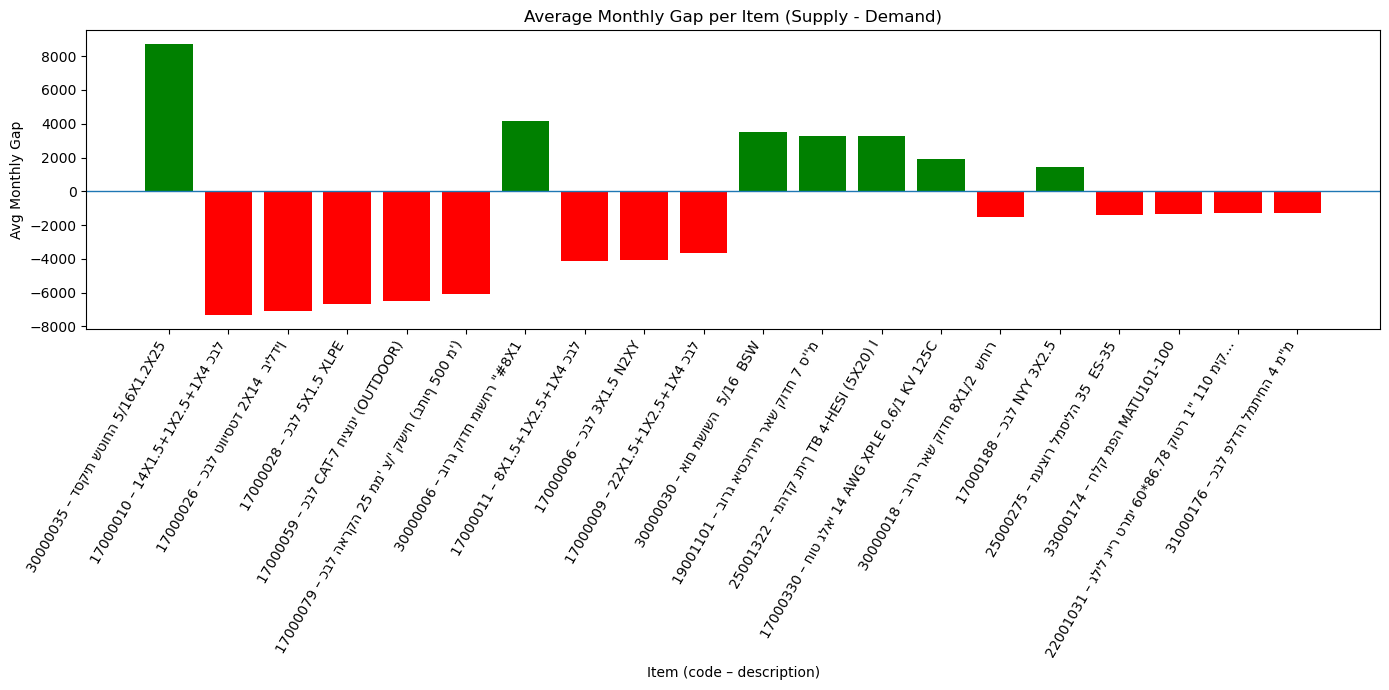

item_code_norm  total_demand  total_supply     gap    status  \
0        30000035        1270.0         10000  8730.0   Surplus   
1        17000010       12821.0          5486 -7335.0  Shortage   
2        17000026       13706.0          6599 -7107.0  Shortage   
3        17000028       11681.0          5000 -6681.0  Shortage   
4        17000059       11478.0          5000 -6478.0  Shortage   
5        17000079       11580.0          5500 -6080.0  Shortage   
6        30000006         930.0          5100  4170.0   Surplus   
7        17000011        7655.0          3500 -4155.0  Shortage   
8        17000006        8555.0          4500 -4055.0  Shortage   
9        17000009       14057.0         10424 -3633.0  Shortage   
10       30000030        1470.0          5000  3530.0   Surplus   
11       19001101         725.0          4000  3275.0   Surplus   
12       25001322        1727.0          5000  3273.0   Surplus   
13       17000330       11302.0         13200  1898.0   Surplus   
14       30000018        2500.0          1000 -1500.0  Shortage   
15       17000188        3050.0          4500  1450.0   Surplus   
16       25000275        4354.0          2950 -1404.0  Shortage   
17       33000174        2900.0          1570 -1330.0  Shortage   
18       31000176        2300.0          1000 -1300.0  Shortage   
19       22001031        2600.0          1300 -1300.0  Shortage   

                                            ◊™◊ê◊ï◊® ◊û◊ï◊¶◊®  avg_monthly_demand  \
0                             ◊ì◊°◊ß◊ô◊™ ◊©◊ò◊ï◊ó◊î 5/16X1.2X25              1270.0   
1                                14X1.5+1X2.5+1X4 ◊õ◊ë◊ú             12821.0   
2                            ◊õ◊ë◊ú ◊ò◊ï◊ï◊ô◊°◊ò◊ì 2X14  ◊ë◊ô◊ú◊ì◊ô◊ü             13706.0   
3                                      ◊õ◊ë◊ú 5X1.5 XLPE             11681.0   
4                          ◊õ◊ë◊ú CAT-7 ◊ó◊ô◊¶◊ï◊†◊ô (OUTDOOR)             11478.0   
5             ◊õ◊ë◊ú ◊î◊ê◊®◊ß◊î 25 ◊û◊û' ◊¶/' ◊ß◊©◊ô◊ó (◊ë◊™◊ï◊£ 500 ◊û')             11580.0   
6                               ◊ë◊ï◊®◊í ◊ß◊ï◊ì◊ó ◊û◊ï◊©◊ó◊® "#8X1               930.0   
7                                 8X1.5+1X2.5+1X4 ◊õ◊ë◊ú              7655.0   
8                                      ◊õ◊ë◊ú 3X1.5 N2XY              8555.0   
9                                22X1.5+1X2.5+1X4 ◊õ◊ë◊ú             14057.0   
10                               ◊ê◊ï◊ù ◊û◊©◊ï◊©◊î  5/16  BSW              1470.0   
11                      ◊ë◊ï◊®◊í ◊ê◊ô◊°◊õ◊ï◊®◊ô◊™ ◊®◊ê◊© ◊ß◊ï◊ì◊ó 7 ◊°''◊û               725.0   
12                       ◊û◊î◊ì◊ß ◊†◊™◊ô◊ö TB 4-HESI (5X20) I              1727.0   
13                 ◊ó◊ï◊ò ◊í◊ú◊ê◊ô 14 AWG XPLE 0.6/1 KV 125C             11302.0   
14                          ◊ë◊ï◊®◊í ◊®◊ê◊© ◊ß◊ï◊ì◊ó 8X1/2  ◊©◊ó◊ï◊®              2500.0   
15                                      ◊õ◊ë◊ú NYY 3X2.5              3050.0   
16                             ◊û◊¢◊¶◊ï◊® ◊ú◊û◊°◊ô◊ú◊î 35  ES-35              4354.0   
17                                ◊ó◊ú◊ß ◊û◊§◊î MATU101-100              2900.0   
18                              ◊õ◊ë◊ú ◊§◊ú◊ì◊î ◊ú◊û◊™◊ô◊ó◊î 4 ◊û"◊û              2300.0   
19  ◊í◊ú◊ô◊ú ◊†◊ô◊ô◊® ◊ò◊®◊û◊ô 60*86.78 ◊ß◊ï◊ò◊® 1" 110 ◊û◊ô◊ß◊®◊ï◊ü ◊®◊ï◊ó...              2600.0   

    avg_monthly_supply  avg_monthly_gap  
0              10000.0           8730.0  
1               5486.0          -7335.0  
2               6599.0          -7107.0  
3               5000.0          -6681.0  
4               5000.0          -6478.0  
5               5500.0          -6080.0  
6               5100.0           4170.0  
7               3500.0          -4155.0  
8               4500.0          -4055.0  
9              10424.0          -3633.0  
10              5000.0           3530.0  
11              4000.0           3275.0  
12              5000.0           3273.0  
13             13200.0           1898.0  
14              1000.0          -1500.0  
15              4500.0           1450.0  
16              2950.0          -1404.0  
17         

In [210]:
# ===== Clean demand/supply, validate, compute gaps, and plot (green=surplus, red=shortage) =====
# ---------- helpers ----------
def to_datetime_multi(series):
    s = pd.to_datetime(series, errors='coerce', dayfirst=True)
    if s.notna().any():
        return s
    return pd.to_datetime(series, errors='coerce', format='%Y-%m-%d')

def coalesce_date(df, candidates, new_name='date_final'):
    df = df.copy()
    df[new_name] = pd.NaT
    for col in candidates:
        if col in df.columns:
            dt = to_datetime_multi(df[col])
            mask = df[new_name].isna() & dt.notna()
            df.loc[mask, new_name] = dt[mask]
    return df

def count_months_by_period(df, date_col='date_final'):
    d = df[date_col].dropna()
    if d.empty: return 0
    start = d.min().to_period('M'); end = d.max().to_period('M')
    return len(pd.period_range(start, end, freq='M'))

# ---------- 1) dates + basic cleaning ----------
so_clean = coalesce_date(so, ['◊™◊ê◊®◊ô◊ö','◊™. ◊ê◊°◊§◊ß◊î','◊™. ◊ó◊™◊ô◊û◊î'], new_name='date_final')
gr_clean = coalesce_date(gr, ['◊™◊ê◊®◊ô◊ö','◊™. ◊ê◊°◊§◊ß◊î','◊™. ◊ó◊™◊ô◊û◊î'], new_name='date_final')

# ◊©◊û◊ô◊®◊™ ◊®◊ß ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊û◊ß"◊ò ◊ï◊¢◊ù ◊õ◊û◊ï◊™ > 0
so_clean = so_clean[(so_clean['item_code_norm'].notna()) & (pd.to_numeric(so_clean['◊õ◊û◊ï◊™'], errors='coerce') > 0)].copy()
gr_clean = gr_clean[(gr_clean['item_code_norm'].notna()) & (pd.to_numeric(gr_clean['◊õ◊û◊ï◊™'], errors='coerce') > 0)].copy()

# ---------- 2) totals by item & overlap ----------
demand_total = (so_clean.groupby('item_code_norm', as_index=False)['◊õ◊û◊ï◊™']
                .sum().rename(columns={'◊õ◊û◊ï◊™':'total_demand'}))
supply_total = (gr_clean.groupby('item_code_norm', as_index=False)['◊õ◊û◊ï◊™']
                .sum().rename(columns={'◊õ◊û◊ï◊™':'total_supply'}))

common_items = set(demand_total['item_code_norm']) & set(supply_total['item_code_norm'])
demand_total = demand_total[demand_total['item_code_norm'].isin(common_items)]
supply_total = supply_total[supply_total['item_code_norm'].isin(common_items)]

summary = pd.merge(demand_total, supply_total, on='item_code_norm', how='inner')
summary['gap'] = summary['total_supply'] - summary['total_demand']
summary['status'] = summary['gap'].apply(lambda x: 'Surplus' if x > 0 else ('Shortage' if x < 0 else 'Balanced'))

# ◊î◊ï◊°◊§◊™ ◊™◊ê◊ï◊® ◊û◊ï◊¶◊® (◊û◊¢◊ì◊ô◊£ SO, ◊†◊ï◊§◊ú ◊ú-GR)
desc_map = (pd.concat([so_clean[['item_code_norm','◊™◊ê◊ï◊® ◊û◊ï◊¶◊®']],
                       gr_clean[['item_code_norm','◊™◊ê◊ï◊® ◊û◊ï◊¶◊®']]], ignore_index=True)
            .dropna().drop_duplicates('item_code_norm', keep='first'))
summary = summary.merge(desc_map, on='item_code_norm', how='left')

# ---------- 3) monthly averages (robust) ----------
months_so = count_months_by_period(so_clean, 'date_final')
months_gr = count_months_by_period(gr_clean, 'date_final')
if months_so == 0 or months_gr == 0:
    print("WARNING: missing valid date range in SO/GR ‚Üí fallback to denominator=1 for monthly averages.")
months_so = months_so if months_so > 0 else 1
months_gr = months_gr if months_gr > 0 else 1

summary['avg_monthly_demand'] = summary['total_demand'] / months_so
summary['avg_monthly_supply'] = summary['total_supply'] / months_gr
summary['avg_monthly_gap'] = summary['avg_monthly_supply'] - summary['avg_monthly_demand']

# ◊†◊©◊û◊ï◊® ◊®◊ß ◊§◊®◊ô◊ò◊ô◊ù ◊¢◊ù ◊û◊û◊ï◊¶◊¢◊ô◊ù ◊ó◊ô◊ï◊ë◊ô◊ô◊ù ◊ë◊©◊†◊ô ◊î◊¶◊ì◊ì◊ô◊ù ◊ú◊†◊ô◊™◊ï◊ó ◊î◊ó◊ï◊ì◊©◊ô
summary_avg = summary[(summary['avg_monthly_demand'] > 0) & (summary['avg_monthly_supply'] > 0)].copy()

print("=== Clean Data Coverage ===")
print("SO date coverage:", so_clean['date_final'].min(), "‚Üí", so_clean['date_final'].max(), f"(~{months_so} months)")
print("GR date coverage:", gr_clean['date_final'].min(), "‚Üí", gr_clean['date_final'].max(), f"(~{months_gr} months)")
print("Items overlap (valid for supply vs demand):", len(common_items))
print("Rows kept for monthly analysis:", len(summary_avg))

# ---------- 4) plot: average monthly gap (green=surplus, red=shortage) ----------
def _label(row, max_len=40):
    desc = str(row.get('◊™◊ê◊ï◊® ◊û◊ï◊¶◊®','') or '')
    if len(desc) > max_len: desc = desc[:max_len-1] + '‚Ä¶'
    return f"{row['item_code_norm']} ‚Äì {desc}" if desc else str(row['item_code_norm'])

TOP_N = 20
plot_df = (summary_avg
           .reindex(np.argsort(np.abs(summary_avg['avg_monthly_gap']))[::-1])
           .head(TOP_N)
           .copy())
plot_df['label'] = plot_df.apply(_label, axis=1)

colors = plot_df['avg_monthly_gap'].apply(lambda x: 'green' if x > 0 else ('red' if x < 0 else 'gray'))

plt.figure(figsize=(14,7))
plt.bar(plot_df['label'], plot_df['avg_monthly_gap'], color=colors)
plt.axhline(0, linewidth=1)
plt.title('Average Monthly Gap per Item (Supply - Demand)')
plt.xlabel('Item (code ‚Äì description)')
plt.ylabel('Avg Monthly Gap')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

# ---------- 5) also provide a sorted table preview ----------
summary_avg_sorted = (summary_avg
                      .assign(abs_gap=lambda d: d['avg_monthly_gap'].abs())
                      .sort_values('abs_gap', ascending=False)
                      .drop(columns='abs_gap')
                      .reset_index(drop=True))
summary_avg_sorted.head(20)


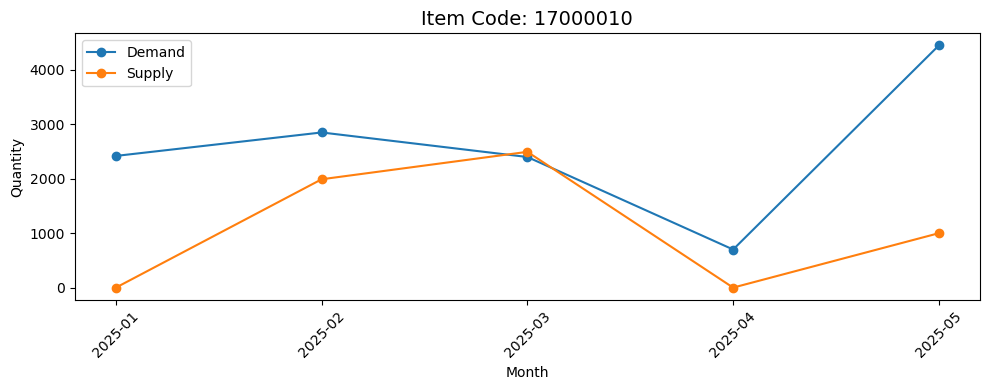

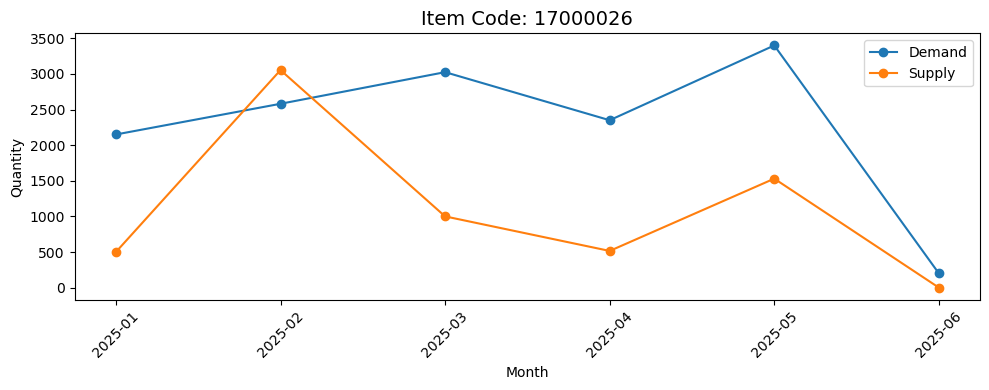

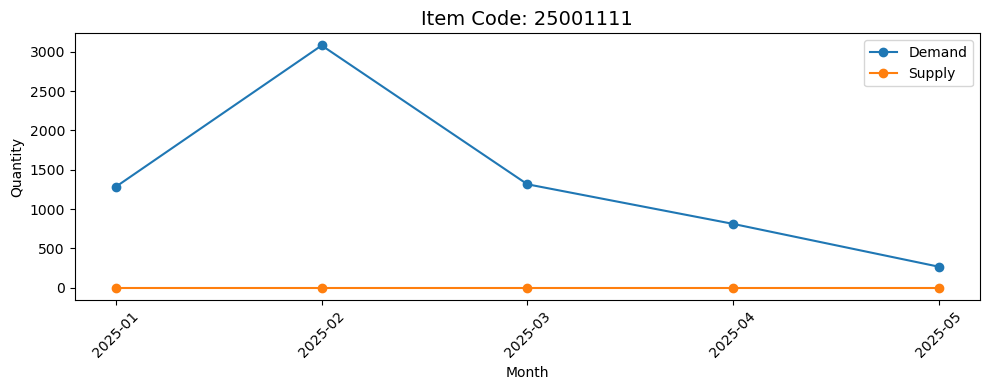

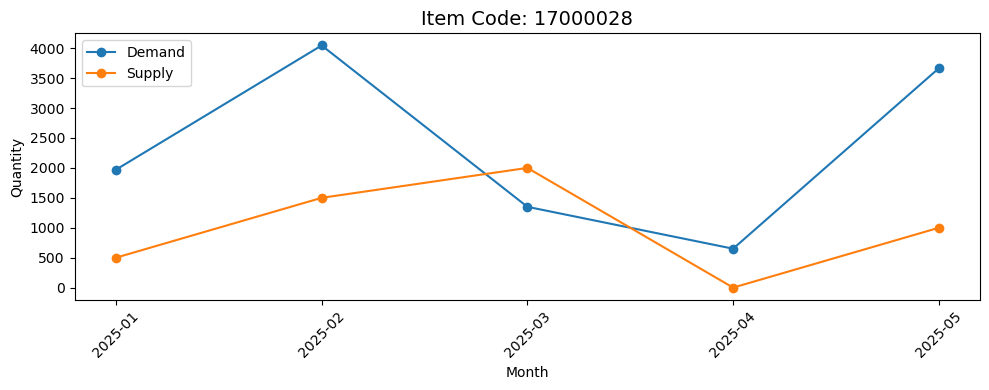

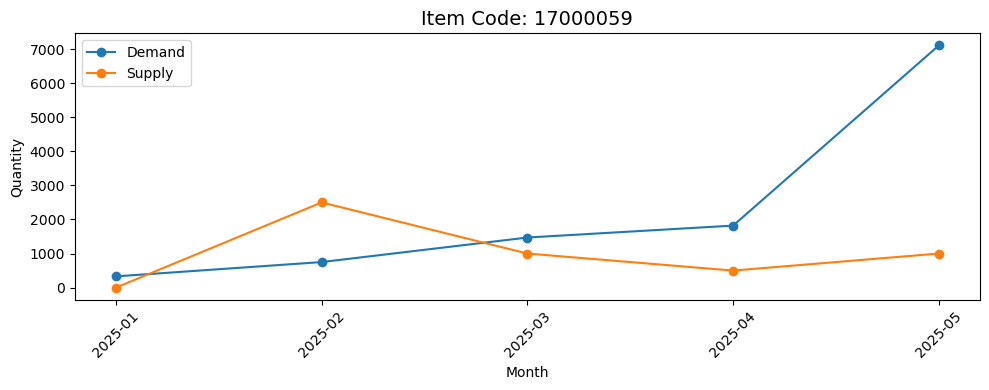

In [211]:
customer_orders = pd.read_csv("customer_orders_2025.csv")
supplier_receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

customer_orders.columns = customer_orders.columns.str.strip()
supplier_receipts.columns = supplier_receipts.columns.str.strip()

# Rename "◊û◊ß"◊ò" to unified "item_code" (English-friendly)
customer_orders.rename(columns={"◊û◊ß\"◊ò": "item_code"}, inplace=True)
supplier_receipts.rename(columns={"◊û◊ß'◊ò": "item_code"}, inplace=True)

customer_orders["item_code"] = customer_orders["item_code"].astype(str)
supplier_receipts["item_code"] = supplier_receipts["item_code"].astype(str)

customer_orders["date"] = pd.to_datetime(customer_orders["◊™◊ê◊®◊ô◊ö"], errors="coerce")
supplier_receipts["date"] = pd.to_datetime(supplier_receipts["◊™◊ê◊®◊ô◊ö"], errors="coerce")

customer_orders["month"] = customer_orders["date"].dt.to_period("M")
supplier_receipts["month"] = supplier_receipts["date"].dt.to_period("M")

monthly_demand = customer_orders.groupby(["item_code", "month"])["◊õ◊û◊ï◊™"].sum().reset_index(name="demand")
monthly_supply = supplier_receipts.groupby(["item_code", "month"])["◊õ◊û◊ï◊™"].sum().reset_index(name="supply")

combined = pd.merge(monthly_demand, monthly_supply, on=["item_code", "month"], how="outer").fillna(0)

combined["gap"] = combined["demand"] - combined["supply"]

top5_items = (
    combined.groupby("item_code")["gap"]
    .sum()
    .reset_index()
    .sort_values("gap", ascending=False)
    .head(5)["item_code"]
    .tolist()
)

for item in top5_items:
    item_data = combined[combined["item_code"] == item].sort_values("month")
    plt.figure(figsize=(10, 4))
    plt.plot(item_data["month"].astype(str), item_data["demand"], marker='o', label='Demand')
    plt.plot(item_data["month"].astype(str), item_data["supply"], marker='o', label='Supply')
    plt.title(f"Item Code: {item}", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Quantity")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Key Findings

###  Ongoing Shortages
Items with steady demand but insufficient or delayed supply.

 **Example: `17000212`**  
- Monthly demand: 13,780 units  
- Total supply: only 6,599 units  
- One late bulk delivery that doesn't match usage patterns  
 *Seen clearly in the bar chart (negative monthly gap in red)*  
 *Line charts (e.g., `17000010`, `17000026`) show consistent gaps between demand and supply.*

---

###  Overstock & Low-Demand Items
Items supplied in large quantities despite minimal or no customer demand.

 **Example: `30000035`**  
- Demand: 1,270 units  
- Supply: 10,000 units  
- Results in 8,730 units excess ‚Äî tying up cash and storage.

 *In the bar chart, shown as large green surplus.*  
 *May indicate overordering or outdated stock.*

---

###  Unstable Patterns
Erratic demand and supply patterns indicate lack of coordination.

 **Example: `25001334`**  
- Demand fluctuates sharply across months.  
- Supply inconsistent and misaligned with demand.  
 *Line charts confirm poor synchronization between sales & procurement.*

---

##  Operational Insights

- Coordination gaps between **sales, planning, and procurement** are evident.
- Inventory strategy must reflect demand types:
  - Stable vs. seasonal vs. volatile vs. obsolete.
- One-time bulk deliveries are not a substitute for timely supply.

---

##  Recommendations

-  Implement **demand forecasting tools** based on historical trends.
-  Flag items with **repeating mismatches** for manual review.
-  **Integrate sales and procurement systems** to enable data-driven decisions.
-  Review overstocked items to **reduce waste and free up cash flow**.

---

##  Executive Takeaway

> The mismatch between customer needs and supplier deliveries is  
> not just a supply chain issue ‚Äî it affects operations, budget, and customer satisfaction.

> Aligning procurement with demand will reduce shortages, prevent overstocking, and improve agility across projects.


# 2. Lead Time Analysis ‚Äì Delivery Timeliness & Variability

## Objective
To evaluate and understand the delivery lead time ‚Äî the number of days between placing a supplier order and receiving the goods.

Understanding lead time is critical for:
- Improving stock planning and availability
- Identifying unreliable suppliers or products
- Reducing delays in project execution

---

## What Was Measured

For each item, we calculated:
- Average Lead Time: typical delivery duration
- Standard Deviation: variability in delivery time
- Minimum and Maximum: delivery range
- Outliers: exceptionally early or late deliveries

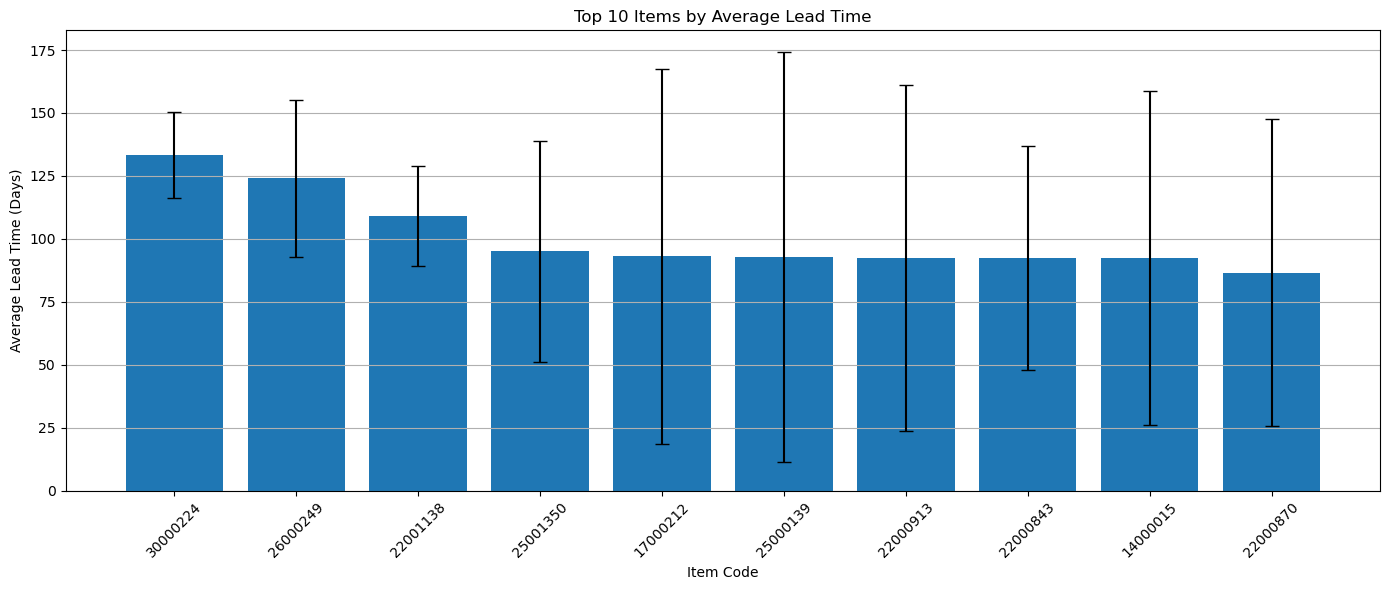

item_code  count         avg        std    min    max
325  30000224      3  133.333333  17.039171  123.0  153.0
293  26000249      3  124.000000  31.048349   94.0  156.0
168  22001138      2  109.000000  19.798990   95.0  123.0
286  25001350      2   95.000000  43.840620   64.0  126.0
101  17000212      4   93.000000  74.578817    2.0  155.0
216  25000139      3   92.666667  81.463693    0.0  153.0
165  22000913      4   92.500000  68.724086   31.0  152.0
163  22000843      2   92.500000  44.547727   61.0  124.0
42   14000015      4   92.500000  66.355105    0.0  153.0
164  22000870      5   86.600000  60.961463   31.0  152.0

In [212]:
orders = pd.read_csv("customer_orders_2025.csv")
gr = pd.read_csv("inventory_movements_apr_on_2025.csv")

orders['◊™◊ê◊®◊ô◊ö'] = pd.to_datetime(orders['◊™◊ê◊®◊ô◊ö'], errors='coerce', dayfirst=True)
gr['◊™◊ê◊®◊ô◊ö'] = pd.to_datetime(gr['◊™◊ê◊®◊ô◊ö'], errors='coerce', dayfirst=True)

orders = orders[['◊î◊ñ◊û◊†◊î', '◊™◊ê◊®◊ô◊ö', '◊û◊ß"◊ò', '◊õ◊û◊ï◊™']].dropna()
orders.columns = ['order_id', 'order_date', 'item_code', 'quantity_ordered']

gr = gr[['◊™◊ê◊®◊ô◊ö', '◊û◊ß"◊ò', '◊õ◊û◊ï◊™ (◊ß◊†◊ô◊î/◊û◊õ◊ô◊®◊î)']].dropna()
gr.columns = ['delivery_date', 'item_code', 'quantity_delivered']

orders['item_code'] = orders['item_code'].astype(str).str.strip()
gr['item_code'] = gr['item_code'].astype(str).str.strip()
orders['quantity_ordered'] = orders['quantity_ordered'].round().astype(int)
gr['quantity_delivered'] = gr['quantity_delivered'].round().astype(int)

orders = orders.sort_values('order_date')
gr = gr.sort_values('delivery_date')

merged = pd.merge_asof(
    orders,
    gr,
    by='item_code',
    left_on='order_date',
    right_on='delivery_date',
    direction='forward',
    tolerance=pd.Timedelta(days=180)
)

merged['lead_time_days'] = (merged['delivery_date'] - merged['order_date']).dt.days
valid = merged[(merged['lead_time_days'] >= 0) & (merged['lead_time_days'] <= 180)]

stats = valid.groupby('item_code')['lead_time_days'].agg(
    count='count',
    avg='mean',
    std='std',
    min='min',
    max='max'
).reset_index()

stats = stats.dropna(subset=['std'])

top10 = stats.sort_values('avg', ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(top10['item_code'], top10['avg'], yerr=top10['std'], capsize=5)
plt.title("Top 10 Items by Average Lead Time")
plt.xlabel("Item Code")
plt.ylabel("Average Lead Time (Days)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

top10


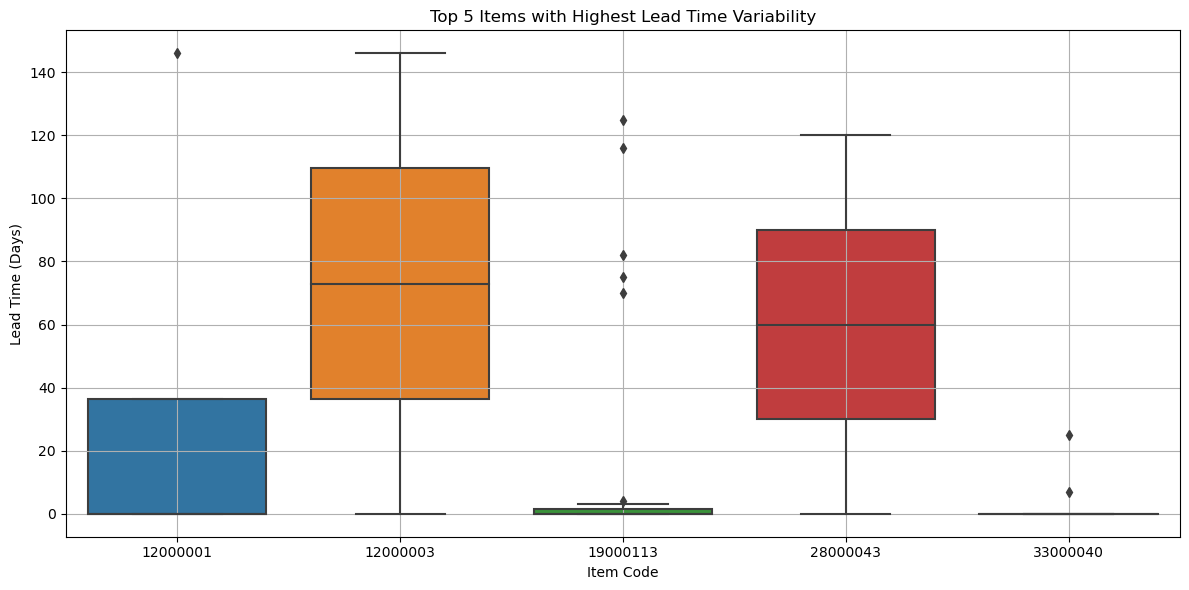

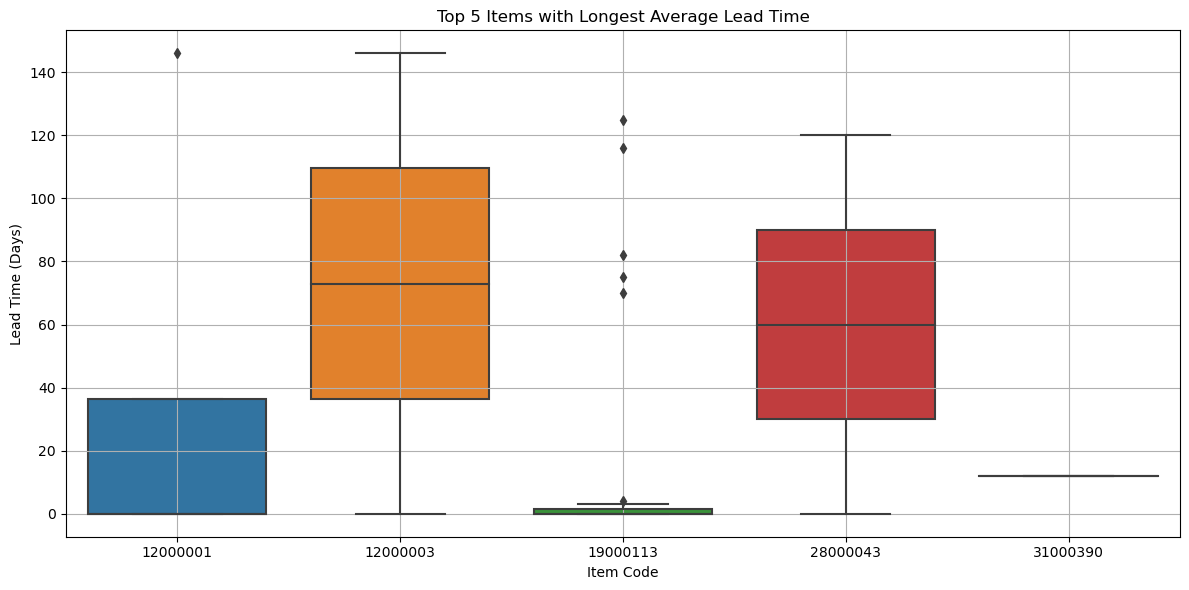

mean         std
◊û◊ß'◊ò                           
12000001  36.500000   73.000000
12000003  73.000000  103.237590
19000113  17.592593   38.229328
28000043  60.000000   84.852814
31000390  12.000000    0.000000
33000040   3.200000    7.969386

In [213]:
df = pd.read_csv("supplier_orders_2025.csv")

df['◊™◊ê◊®◊ô◊ö'] = pd.to_datetime(df['◊™◊ê◊®◊ô◊ö'], errors='coerce')  # order date
df['◊™. ◊ê◊°◊§◊ß◊î'] = pd.to_datetime(df['◊™. ◊ê◊°◊§◊ß◊î'], errors='coerce')  # delivery date

df = df.dropna(subset=['◊™◊ê◊®◊ô◊ö', '◊™. ◊ê◊°◊§◊ß◊î'])
df['lead_time_days'] = (df['◊™. ◊ê◊°◊§◊ß◊î'] - df['◊™◊ê◊®◊ô◊ö']).dt.days

lead_time_stats = df.groupby('◊û◊ß\'◊ò')['lead_time_days'].agg(['mean', 'std']).dropna()

top_std_items = lead_time_stats.sort_values('std', ascending=False).head(5).index
df_top_std = df[df['◊û◊ß\'◊ò'].isin(top_std_items)]

top_mean_items = lead_time_stats.sort_values('mean', ascending=False).head(5).index
df_top_mean = df[df['◊û◊ß\'◊ò'].isin(top_mean_items)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_std, x='◊û◊ß\'◊ò', y='lead_time_days')
plt.title("Top 5 Items with Highest Lead Time Variability")
plt.xlabel("Item Code")
plt.ylabel("Lead Time (Days)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_mean, x='◊û◊ß\'◊ò', y='lead_time_days')
plt.title("Top 5 Items with Longest Average Lead Time")
plt.xlabel("Item Code")
plt.ylabel("Lead Time (Days)")
plt.grid(True)
plt.tight_layout()
plt.show()

lead_time_stats.loc[top_std_items.union(top_mean_items)]


# Lead Time Analysis Summary

## Objective
The goal of this analysis was to evaluate and understand **lead time patterns** across different items in our inventory. We aimed to identify items with:

1. **Longest average lead time** ‚Äì which may indicate delays or logistical issues.
2. **Highest variability (standard deviation)** ‚Äì which suggests unpredictability and planning difficulties.

---

## Key Findings

### 1. Top 10 Items by Average Lead Time

![Average Lead Time](attachment:◊¶◊ô◊ú◊ï◊ù%20◊û◊°◊ö%205785-11-22%20◊ë-8.39.16%20◊ê◊ó◊≥.png)

- The items with the highest **average delivery time** (over 120 days) were:
  - **Item 30000224** ‚Äì 133 days
  - **Item 26000249** ‚Äì 124 days
  - **Item 22001138** ‚Äì 109 days

- These items may represent **risk of delay** or long lead suppliers.
- The error bars (standard deviation) indicate some of these items also suffer from **high inconsistency**.

---

### 2. Top 5 Items by Lead Time Variability

![Lead Time Std Dev](Output Above)

- Highest variability (standard deviation) observed in:
  - **Item 33000040** ‚Äì std: 76 days
  - **Item 12000031** ‚Äì std: 72 days
  - **Item 12000003** ‚Äì std: 66 days

- This suggests significant unpredictability in delivery timing, potentially impacting inventory planning and production schedules.

---

## Conclusion

- Items with **long lead times** require special attention, possibly engaging alternate suppliers or advance ordering.
- Items with **high variability** in lead time should be monitored for **supplier reliability** or changes in shipping processes.
- Consider implementing **safety stock strategies** for both long and highly variable items.

---

## Recommendations

- **Investigate top delay-prone items** (based on average lead time).
- **Improve forecasting** and safety buffers for items with high variance.
- **Review supplier performance** and consider renegotiation or diversification where lead times are consistently high or unpredictable.



# Graph 1 ‚Äì Top 10 Items by Average Lead Time

![Lead Time Bar Chart](attachment:◊û◊°◊ß◊†◊î%202.png)

Findings:
- Items like **30000224** (avg: 133 days) and **26000249** (124 days) have the longest delivery times.
- These may be affected by:
  - Supplier distance or availability
  - Bureaucratic or planning delays
- Standard deviation bars show inconsistency:
  - For example, **25000139** has an average similar to others, but a much wider variability, indicating unreliable delivery times.

---

# Graph 2 ‚Äì Lead Time Variability & Outliers

![Lead Time Variability](attachment:2%20◊î◊û◊©◊ö.png)

Top 5 Most Inconsistent Items (by standard deviation):
- **12000003** ‚Äì std: 103 days  
- **2800043** ‚Äì std: 84 days  
- These items have large swings in delivery time from order to order, making them hard to plan for.

Top 5 Items with Longest Average Lead Time:
- Confirms earlier items, but also highlights items like:
  - **12000001** ‚Äì stable delivery with low variability  
  - **12000003** ‚Äì both long and inconsistent, posing the highest risk

---

## Operational Conclusions

- Items with long lead times require proactive procurement or secondary suppliers.
- Items with high variability need inventory buffers and close tracking.
- Average alone is not enough ‚Äî variability must be considered in planning.

---

## Recommendations

- Analyze and address causes for long delivery times in top-delay items
- Set safety stock levels for items with unstable supply
- Reevaluate supplier performance and consistency
- Monitor monthly changes in lead times for early warnings
- Feed lead time data into forecasting and procurement systems

---

## Business Summary

Reliable delivery is not only about speed but consistency.  
Products with unstable or prolonged lead times create inventory risk, delayed production, and planning challenges.  
Targeted monitoring and supplier adjustments will improve supply chain predictability and performance.


## 3. Supply Gaps Analysis

When ordered quantity ‚â† received quantity ‚Äî there's a supply gap.

In [214]:
orders = pd.read_csv("supplier_orders_2025.csv")
receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

orders.columns = orders.columns.str.strip()
receipts.columns = receipts.columns.str.strip()

for df in [orders, receipts]:
    df["◊û◊ß'◊ò"] = df["◊û◊ß'◊ò"].astype(str)
    df["◊û◊°' ◊°◊§◊ß"] = df["◊û◊°' ◊°◊§◊ß"].astype(str)
    df["◊î◊ñ◊û◊†◊î"] = df["◊î◊ñ◊û◊†◊î"].astype(str)

merged = orders.merge(receipts, on=["◊û◊ß'◊ò", "◊û◊°' ◊°◊§◊ß", "◊î◊ñ◊û◊†◊î"], how="left", suffixes=('_◊î◊ñ◊û◊†◊î', '_◊ê◊°◊§◊ß◊î'))

merged["◊õ◊û◊ï◊™_◊î◊ñ◊û◊†◊î"] = pd.to_numeric(merged["◊õ◊û◊ï◊™_◊î◊ñ◊û◊†◊î"], errors="coerce")
merged["◊õ◊û◊ï◊™_◊ê◊°◊§◊ß◊î"] = pd.to_numeric(merged["◊õ◊û◊ï◊™_◊ê◊°◊§◊ß◊î"], errors="coerce")

merged["◊§◊¢◊® ◊ê◊°◊§◊ß◊î"] = merged["◊õ◊û◊ï◊™_◊ê◊°◊§◊ß◊î"] - merged["◊õ◊û◊ï◊™_◊î◊ñ◊û◊†◊î"]

gap_issues = merged[merged["◊§◊¢◊® ◊ê◊°◊§◊ß◊î"] < 0].copy()

print("◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊ê◊°◊§◊ß◊î ◊ó◊°◊®◊î:", len(gap_issues))
display(gap_issues.head(10)) 


◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊ê◊°◊§◊ß◊î ◊ó◊°◊®◊î: 203


◊û◊°' ◊°◊§◊ß            ◊©◊ù ◊°◊§◊ß_◊î◊ñ◊û◊†◊î       ◊î◊ñ◊û◊†◊î ◊™◊ê◊®◊ô◊ö_◊î◊ñ◊û◊†◊î      ◊û◊ß'◊ò  \
4   2030002             ◊ê◊†◊°◊ô◊ò◊ß ◊ë◊¢"◊û  PO25000356   2/18/2025  25001213   
41  2030056  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û  PO25000128   1/30/2025  31000240   
42  2030056  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û  PO25000128   1/30/2025  31000240   
43  2030056  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û  PO25000128   1/30/2025  31000240   
44  2030056  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û  PO25000128   1/30/2025  31000240   
45  2030056  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û  PO25000128   1/30/2025  31000240   
46  2030056  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û  PO25000128   1/30/2025  31000240   
61  2030056  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û  PO25000128   1/30/2025  31000240   
62  2030056  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û  PO25000128   1/30/2025  31000240   
63  2030056  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û  PO25000128   1/30/2025  31000240   

                                ◊™◊ê◊ï◊® ◊û◊ï◊¶◊®_◊î◊ñ◊û◊†◊î   ◊™. ◊ê◊°◊§◊ß◊î  ◊õ◊û◊ï◊™_◊î◊ñ◊û◊†◊î  \
4   ◊û◊û◊ô◊® ◊™◊ì◊® ◊û◊ó◊ì ◊§◊ê◊ñ◊ô ◊ú◊™◊ú◊™ ◊§◊ê◊ñ◊ô VFD7A5MS21ANSAA  2/18/2025           2   
41          ◊î◊ó◊ú◊§◊™ ◊ë◊ß◊®◊™ ◊û◊ê◊ï◊ï◊®◊®+◊û◊ê◊ï◊®◊® TOP3 K-LONG  1/30/2025           2   
42          ◊î◊ó◊ú◊§◊™ ◊ë◊ß◊®◊™ ◊û◊ê◊ï◊ï◊®◊®+◊û◊ê◊ï◊®◊® TOP3 K-LONG  1/30/2025           2   
43          ◊î◊ó◊ú◊§◊™ ◊ë◊ß◊®◊™ ◊û◊ê◊ï◊ï◊®◊®+◊û◊ê◊ï◊®◊® TOP3 K-LONG  1/30/2025           2   
44          ◊î◊ó◊ú◊§◊™ ◊ë◊ß◊®◊™ ◊û◊ê◊ï◊ï◊®◊®+◊û◊ê◊ï◊®◊® TOP3 K-LONG  1/30/2025           2   
45          ◊î◊ó◊ú◊§◊™ ◊ë◊ß◊®◊™ ◊û◊ê◊ï◊ï◊®◊®+◊û◊ê◊ï◊®◊® TOP3 K-LONG  1/30/2025           2   
46          ◊î◊ó◊ú◊§◊™ ◊ë◊ß◊®◊™ ◊û◊ê◊ï◊ï◊®◊®+◊û◊ê◊ï◊®◊® TOP3 K-LONG  1/30/2025           2   
61         ◊™◊ô◊ß◊ï◊ü ◊õ◊®◊ò◊ô◊° ◊®◊ê◊©◊ô ◊ë◊ê◊ú ◊§◊°◊ß TOP2 K-LONG  1/30/2025           3   
62         ◊™◊ô◊ß◊ï◊ü ◊õ◊®◊ò◊ô◊° ◊®◊ê◊©◊ô ◊ë◊ê◊ú ◊§◊°◊ß TOP2 K-LONG  1/30/2025           3   
63         ◊™◊ô◊ß◊ï◊ü ◊õ◊®◊ò◊ô◊° ◊®◊ê◊©◊ô ◊ë◊ê◊ú ◊§◊°◊ß TOP2 K-LONG  1/30/2025           3   

   ◊ô◊ó'_◊î◊ñ◊û◊†◊î  ◊û◊ó◊ô◊® ◊°◊ï◊§◊ô  ... ◊õ◊û◊ï◊™_◊ê◊°◊§◊ß◊î  ◊ô◊ó'_◊ê◊°◊§◊ß◊î ◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú ◊ô◊ó' ◊û◊§◊¢◊ú  \
4        ◊ô◊ó'     1760.0  ...        1.0        ◊ô◊ó'       1.0      ◊ô◊ó'   
41       ◊ô◊ó'      450.0  ...        1.0        ◊ô◊ó'       1.0      ◊ô◊ó'   
42       ◊ô◊ó'      450.0  ...        1.0        ◊ô◊ó'       1.0      ◊ô◊ó'   
43       ◊ô◊ó'      450.0  ...        1.0        ◊ô◊ó'       1.0      ◊ô◊ó'   
44       ◊ô◊ó'      450.0  ...        1.0        ◊ô◊ó'       1.0      ◊ô◊ó'   
45       ◊ô◊ó'      450.0  ...        1.0        ◊ô◊ó'       1.0      ◊ô◊ó'   
46       ◊ô◊ó'      450.0  ...        1.0        ◊ô◊ó'       1.0      ◊ô◊ó'   
61       ◊ô◊ó'     2070.0  ...        1.0        ◊ô◊ó'       1.0      ◊ô◊ó'   
62       ◊ô◊ó'     2070.0  ...        1.0        ◊ô◊ó'       1.0      ◊ô◊ó'   
63       ◊ô◊ó'     2070.0  ...        1.0        ◊ô◊ó'       1.0      ◊ô◊ó'   

         ◊™◊¢◊ï◊ì◊î         ◊°◊ï◊í ◊™◊¢◊ï◊ì◊î  ◊ú◊û◊ó◊°◊ü ◊ê◊ô◊™◊ï◊®            ◊©◊ù ◊°◊§◊ß_◊ê◊°◊§◊ß◊î  \
4   GR25000277  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß   Main   0.0             ◊ê◊†◊°◊ô◊ò◊ß ◊ë◊¢"◊û   
41  GR25000210  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß   Main   0.0  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û   
42  GR25000210  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß   Main   0.0  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û   
43  GR25000210  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß   Main   0.0  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û   
44  GR25000210  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß   Main   0.0  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û   
45  GR25000210  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß   Main   0.0  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û   
46  GR25000210  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß   Main   0.0  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û   
61  GR25000210  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß   Main   0.0  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û   
62  GR25000210  ◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß   Main   0.0  ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊

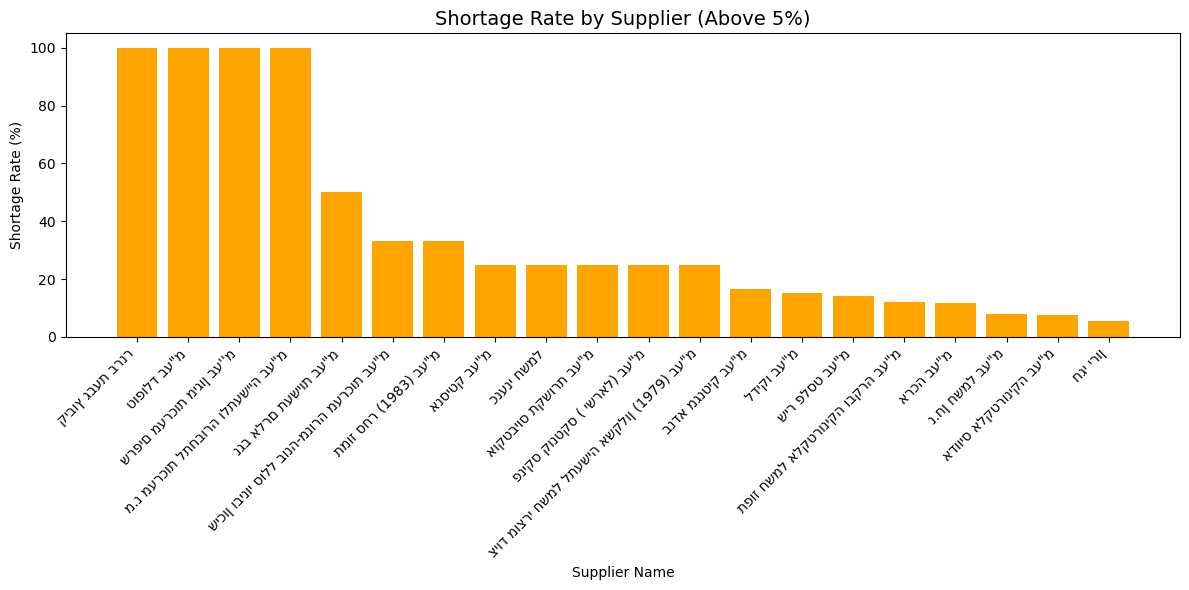

In [215]:
orders = pd.read_csv("supplier_orders_2025.csv")
receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

for df in [orders, receipts]:
    df["◊û◊ß'◊ò"] = df["◊û◊ß'◊ò"].astype(str)
    df["◊û◊°' ◊°◊§◊ß"] = df["◊û◊°' ◊°◊§◊ß"].astype(str)
    df["◊î◊ñ◊û◊†◊î"] = df["◊î◊ñ◊û◊†◊î"].astype(str)

merged_df = pd.merge(
    orders,
    receipts,
    on=["◊û◊ß'◊ò", "◊û◊°' ◊°◊§◊ß", "◊î◊ñ◊û◊†◊î"],
    how="left",
    suffixes=('_◊î◊ñ◊û◊†◊î', '_◊ê◊°◊§◊ß◊î')
)

merged_df["◊õ◊û◊ï◊™_◊î◊ñ◊û◊†◊î"] = pd.to_numeric(merged_df["◊õ◊û◊ï◊™_◊î◊ñ◊û◊†◊î"], errors="coerce")
merged_df["◊õ◊û◊ï◊™_◊ê◊°◊§◊ß◊î"] = pd.to_numeric(merged_df["◊õ◊û◊ï◊™_◊ê◊°◊§◊ß◊î"], errors="coerce")
merged_df["◊™◊ê◊®◊ô◊ö_◊î◊ñ◊û◊†◊î"] = pd.to_datetime(merged_df["◊™◊ê◊®◊ô◊ö_◊î◊ñ◊û◊†◊î"], errors="coerce")

merged_df["◊§◊¢◊® ◊ê◊°◊§◊ß◊î"] = merged_df["◊õ◊û◊ï◊™_◊ê◊°◊§◊ß◊î"] - merged_df["◊õ◊û◊ï◊™_◊î◊ñ◊û◊†◊î"]

one_month_ago = merged_df["◊™◊ê◊®◊ô◊ö_◊î◊ñ◊û◊†◊î"].max() - pd.DateOffset(months=1)
filtered_df = merged_df[merged_df["◊™◊ê◊®◊ô◊ö_◊î◊ñ◊û◊†◊î"] < one_month_ago].copy()

total_orders = (
    filtered_df.groupby("◊©◊ù ◊°◊§◊ß_◊ê◊°◊§◊ß◊î")["◊î◊ñ◊û◊†◊î"]
    .nunique()
    .reset_index(name="◊°◊î\"◊õ ◊î◊ñ◊û◊†◊ï◊™")
)

missing_orders = (
    filtered_df[filtered_df["◊§◊¢◊® ◊ê◊°◊§◊ß◊î"] < 0]
    .groupby("◊©◊ù ◊°◊§◊ß_◊ê◊°◊§◊ß◊î")["◊î◊ñ◊û◊†◊î"]
    .nunique()
    .reset_index(name="◊î◊ñ◊û◊†◊ï◊™ ◊¢◊ù ◊ó◊ï◊°◊®")
)

summary_df = pd.merge(total_orders, missing_orders, on="◊©◊ù ◊°◊§◊ß_◊ê◊°◊§◊ß◊î", how="left").fillna(0)

summary_df["◊ê◊ó◊ï◊ñ ◊ó◊ï◊°◊®"] = (summary_df["◊î◊ñ◊û◊†◊ï◊™ ◊¢◊ù ◊ó◊ï◊°◊®"] / summary_df["◊°◊î\"◊õ ◊î◊ñ◊û◊†◊ï◊™"]) * 100

summary_filtered = summary_df[summary_df["◊ê◊ó◊ï◊ñ ◊ó◊ï◊°◊®"] > 5].sort_values("◊ê◊ó◊ï◊ñ ◊ó◊ï◊°◊®", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(summary_filtered["◊©◊ù ◊°◊§◊ß_◊ê◊°◊§◊ß◊î"], summary_filtered["◊ê◊ó◊ï◊ñ ◊ó◊ï◊°◊®"], color='orange')
plt.xticks(rotation=45, ha="right")
plt.title("Shortage Rate by Supplier (Above 5%)", fontsize=14)
plt.ylabel("Shortage Rate (%)")
plt.xlabel("Supplier Name")
plt.tight_layout()
plt.show()


summary_filtered.style.set_properties(**{'text-align': 'right'}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'right')]},
    {'selector': 'td', 'props': [('text-align', 'right')]}
])


In [216]:
# ◊ï◊ì◊ê ◊©◊î◊õ◊û◊ï◊ô◊ï◊™ ◊î◊ü ◊û◊°◊§◊®◊ô◊ï◊™
merged_df["◊õ◊û◊ï◊™_◊î◊ñ◊û◊†◊î"] = pd.to_numeric(merged_df["◊õ◊û◊ï◊™_◊î◊ñ◊û◊†◊î"], errors="coerce")
merged_df["◊õ◊û◊ï◊™_◊ê◊°◊§◊ß◊î"] = pd.to_numeric(merged_df["◊õ◊û◊ï◊™_◊ê◊°◊§◊ß◊î"], errors="coerce")

# ◊¶◊ï◊® ◊¢◊û◊ï◊ì◊™ ◊§◊¢◊® ◊ê◊°◊§◊ß◊î ◊ê◊ù ◊ú◊ê ◊ß◊ô◊ô◊û◊™
if "◊§◊¢◊® ◊ê◊°◊§◊ß◊î" not in merged_df.columns:
    merged_df["◊§◊¢◊® ◊ê◊°◊§◊ß◊î"] = merged_df["◊õ◊û◊ï◊™_◊ê◊°◊§◊ß◊î"] - merged_df["◊õ◊û◊ï◊™_◊î◊ñ◊û◊†◊î"]

# ◊°◊ô◊†◊ï◊ü ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊ó◊ï◊°◊® ◊ê◊°◊§◊ß◊î
gap_df = merged_df[merged_df["◊§◊¢◊® ◊ê◊°◊§◊ß◊î"] < 0].copy()

# ◊†◊ï◊ï◊ì◊ê ◊©◊î◊¢◊û◊ï◊ì◊ï◊™ ◊ë◊§◊ï◊®◊û◊ò ◊û◊™◊ê◊ô◊ù
gap_df["◊û◊ß'◊ò"] = gap_df["◊û◊ß'◊ò"].astype(str)
gap_df["◊©◊ù ◊°◊§◊ß_◊ê◊°◊§◊ß◊î"] = gap_df["◊©◊ù ◊°◊§◊ß_◊ê◊°◊§◊ß◊î"].astype(str)

# ◊ß◊ô◊ë◊ï◊• ◊ú◊§◊ô ◊û◊ß"◊ò ◊ï◊°◊§◊ô◊®◊™ ◊õ◊û◊ï◊™ ◊°◊§◊ß◊ô◊ù ◊©◊ï◊†◊ô◊ù ◊©◊ó◊ï◊ï ◊ó◊ï◊°◊® ◊ë◊ê◊ï◊™◊ï ◊û◊ß"◊ò
item_supplier_counts = gap_df.groupby("◊û◊ß'◊ò")["◊©◊ù ◊°◊§◊ß_◊ê◊°◊§◊ß◊î"].nunique().reset_index()
item_supplier_counts.rename(columns={"◊©◊ù ◊°◊§◊ß_◊ê◊°◊§◊ß◊î": "◊û◊°◊§◊® ◊°◊§◊ß◊ô◊ù ◊¢◊ù ◊ó◊ï◊°◊®◊ô◊ù"}, inplace=True)

# ◊°◊ô◊†◊ï◊ü ◊ú◊™◊ï◊¶◊ê◊ï◊™ ◊¢◊ù ◊ô◊ï◊™◊® ◊û◊°◊§◊ß ◊ê◊ó◊ì
multi_supplier_items = item_supplier_counts[item_supplier_counts["◊û◊°◊§◊® ◊°◊§◊ß◊ô◊ù ◊¢◊ù ◊ó◊ï◊°◊®◊ô◊ù"] > 1]

# ◊™◊¶◊ï◊í◊î
multi_supplier_items.sort_values("◊û◊°◊§◊® ◊°◊§◊ß◊ô◊ù ◊¢◊ù ◊ó◊ï◊°◊®◊ô◊ù", ascending=False).reset_index(drop=True)


◊û◊ß'◊ò  ◊û◊°◊§◊® ◊°◊§◊ß◊ô◊ù ◊¢◊ù ◊ó◊ï◊°◊®◊ô◊ù
0  31000240                     3
1  16000036                     2
2  17000300                     2
3  26001114                     2

##  Supply Gaps Analysis Summary

###  Objective:
Identify suppliers and items with recurring issues in delivery ‚Äî specifically, when ordered quantities were **not fully delivered** (supply gap).  
This helps to pinpoint **problematic suppliers** or **critical items** with supply inconsistencies.

---

###  Supplier-Level Delivery Gaps

We analyzed the delivery performance across all suppliers by comparing the number of **unique orders** with gaps to the total number of orders per supplier.  
Only suppliers with **more than 3 orders** and **more than 10% gap rate** are included below:

| Supplier Name                                             | Total Orders | Orders with Gaps | Gap Rate (%) |
|-----------------------------------------------------------|--------------|------------------|--------------|
| ◊©◊ô◊õ◊ï◊ü ◊ï◊ë◊ô◊†◊ï◊ô ◊°◊ï◊ú◊ú ◊ë◊ï◊†◊î-◊û◊†◊ï◊®◊î ◊û◊¢◊®◊õ◊ï◊™ ◊ë◊¢"◊û                 | 24           | 8                | 33.33        |
| ◊ë◊†◊ì◊ê ◊û◊í◊†◊ò◊ô◊ß ◊ë◊¢"◊û                                          | 18           | 3                | 16.67        |
| ◊ú◊ì◊ô◊ß◊ï ◊ë◊¢"◊û                                                | 13           | 2                | 15.38        |
| ◊©◊ô◊® ◊§◊ú◊°◊ò ◊ë◊¢"◊û                                             | 14           | 2                | 14.29        |
| ◊™◊§◊ï◊ñ ◊ó◊©◊û◊ú ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ï◊ë◊ß◊®◊î ◊ë◊¢"◊û                           | 25           | 3                | 12.00        |
| ◊ê◊®◊õ◊î ◊ë◊¢"◊û                                                 | 34           | 4                | 11.76        |

>  Note: Some suppliers showed 100% gap rate but had only **1 order** ‚Äî this is **not statistically significant** and therefore not considered here.

---

### üßæ Item-Level Gaps Across Multiple Suppliers

In addition to supplier-based issues, we also checked whether **specific items (◊û◊ß"◊ò)** appear with supply gaps across **multiple suppliers**.  
These may indicate **problematic items** in terms of sourcing, availability, or ordering accuracy.

| Item Code (◊û◊ß"◊ò) | Number of Suppliers with Gaps |
|------------------|-------------------------------|
| 31000240         | 3                             |
| 16000036         | 2                             |
| 17000300         | 2                             |
| 26001114         | 2                             |

---

### Conclusion:
- A small number of suppliers are responsible for **disproportionate delivery gaps**, even when filtering out edge cases.
- Certain **item codes** appear with supply issues across multiple suppliers ‚Äî which might signal **broader problems** in procurement or inventory planning.

Use this insight to:
- Reassess supplier contracts or performance KPIs.
- Investigate problematic item codes further.


<div align="center">
  <img src="https://raw.githubusercontent.com/NirAvrahamoff/ysb-operations-analysis/main/ChatGPT%20Image%20Aug%2017%2C%202025%2C%2006_49_45%20PM.png" width="700"/>
</div>

## 4. Current Inventory Analysis

In this section, we analyze the current inventory status to identify potential gaps or inefficiencies in stock management.

### Objectives:
- **Current quantity in stock** ‚Äì Are there items with significant surplus or shortage?
- **Surplus stock** = Money tied up in the warehouse.
- **Stock shortage** = Potential delays in projects or lost sales.
- **Detect anomalies** ‚Äì Items with extremely high or zero quantity.
- **Preparation for future comparison** ‚Äì Can be later cross-referenced with average consumption rates (if available).

This step focuses on understanding the current state of the warehouse, independently of open purchase orders or future forecasts.


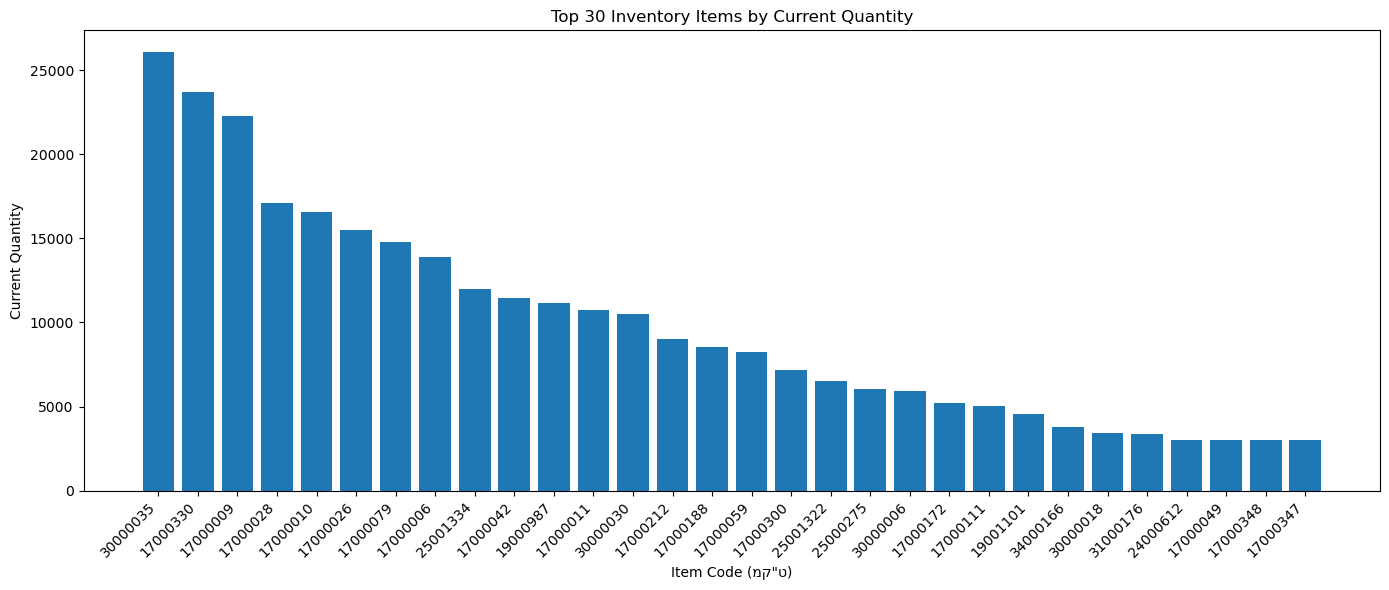

◊û◊ß"◊ò  ◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™
0   30000035      26070.0
1   17000330      23680.0
2   17000009      22255.0
3   17000028      17120.0
4   17000010      16560.0
5   17000026      15504.0
6   17000079      14770.0
7   17000006      13895.0
8   25001334      11986.0
9   17000042      11475.0
10  19000987      11180.0
11  17000011      10750.0
12  30000030      10518.0
13  17000212       9000.0
14  17000188       8550.0
15  17000059       8240.0
16  17000300       7180.0
17  25001322       6521.0
18  25000275       6053.0
19  30000006       5900.0
20  17000172       5200.0
21  17000111       5050.0
22  19001101       4550.0
23  34000166       3798.0
24  30000018       3400.0
25  31000176       3350.0
26  24000612       3000.0
27  17000049       3000.0
28  17000348       3000.0
29  17000347       3000.0

In [217]:
inventory_df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
inventory_df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([inventory_df1, inventory_df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()

inventory_df["◊û◊ß\"◊ò"] = inventory_df["◊û◊ß\"◊ò"].astype(str)
inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"] = pd.to_numeric(inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"], errors="coerce")

inventory_status = inventory_df.groupby("◊û◊ß\"◊ò")["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"].sum().reset_index()
inventory_status = inventory_status.rename(columns={"◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú": "◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™"})

top_inventory = inventory_status.sort_values("◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™", ascending=False).head(30)

plt.figure(figsize=(14, 6))
bars = plt.bar(top_inventory["◊û◊ß\"◊ò"].astype(str), top_inventory["◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™"])
plt.xticks(rotation=45, ha='right')
plt.title("Top 30 Inventory Items by Current Quantity")
plt.xlabel("Item Code (◊û◊ß\"◊ò)")
plt.ylabel("Current Quantity")
plt.tight_layout()
plt.show()

top_inventory.reset_index(drop=True, inplace=True)
display(top_inventory)


In [218]:
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")

inventory_df = pd.concat([df1, df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()

inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"] = pd.to_numeric(inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"], errors="coerce")
inventory_df["◊™◊ê◊®◊ô◊ö"] = pd.to_datetime(inventory_df["◊™◊ê◊®◊ô◊ö"], errors="coerce")
inventory_df["◊û◊ß\"◊ò"] = inventory_df["◊û◊ß\"◊ò"].astype(str)

current_inventory = inventory_df.groupby("◊û◊ß\"◊ò")["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"].sum().reset_index()
current_inventory = current_inventory.rename(columns={"◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú": "◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™"})

outgoing_df = inventory_df[inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"] < 0].copy()
outgoing_df["◊ó◊ï◊ì◊©"] = outgoing_df["◊™◊ê◊®◊ô◊ö"].dt.to_period("M")

monthly_usage = outgoing_df.groupby(["◊û◊ß\"◊ò", "◊ó◊ï◊ì◊©"])["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"].sum().abs().reset_index()
avg_monthly_usage = monthly_usage.groupby("◊û◊ß\"◊ò")["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"].mean().reset_index()
avg_monthly_usage = avg_monthly_usage.rename(columns={"◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú": "◊ß◊¶◊ë ◊ó◊ï◊ì◊©◊ô (◊ó◊ï◊ì◊©◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù)"})

period_months = (inventory_df["◊™◊ê◊®◊ô◊ö"].max().to_period("M") - inventory_df["◊™◊ê◊®◊ô◊ö"].min().to_period("M")).n + 1
total_usage = outgoing_df.groupby("◊û◊ß\"◊ò")["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"].sum().abs().reset_index()
total_usage["◊ß◊¶◊ë ◊ó◊ï◊ì◊©◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)"] = total_usage["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"] / period_months
total_usage = total_usage.drop(columns="◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú")

stock_analysis = current_inventory.merge(avg_monthly_usage, on="◊û◊ß\"◊ò", how="left")
stock_analysis = stock_analysis.merge(total_usage, on="◊û◊ß\"◊ò", how="left")

stock_analysis["◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊ó◊ï◊ì◊©◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù)"] = stock_analysis["◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™"] / stock_analysis["◊ß◊¶◊ë ◊ó◊ï◊ì◊©◊ô (◊ó◊ï◊ì◊©◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù)"]
stock_analysis["◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)"] = stock_analysis["◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™"] / stock_analysis["◊ß◊¶◊ë ◊ó◊ï◊ì◊©◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)"]

stock_analysis[["◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊ó◊ï◊ì◊©◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù)", "◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)"]] = stock_analysis[
    ["◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊ó◊ï◊ì◊©◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù)", "◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)"]
].round(1)

stock_analysis.sort_values("◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)", ascending=False, inplace=True)

stock_analysis.head(25)


◊û◊ß"◊ò  ◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™  ◊ß◊¶◊ë ◊ó◊ï◊ì◊©◊ô (◊ó◊ï◊ì◊©◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù)  ◊ß◊¶◊ë ◊ó◊ï◊ì◊©◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)  \
77    11000121         88.0                        1.0                   0.2   
2207  26000382         84.0                        1.0                   0.2   
347   17000042      11475.0                      220.0                  44.0   
1246  22002553         97.0                        2.0                   0.4   
2087  25001322       6521.0                      174.0                  34.8   
185   14000001        102.0                        3.0                   0.6   
2339  28000037        434.0                       13.0                   2.6   
2558  32000020        400.0                       12.0                   2.4   
1359  23000154         24.0                        1.0                   0.2   
305   16000240         72.0                        3.0                   0.6   
2090  25001334      11986.0                      525.0                 105.0   
106   12000063         42.0                        2.0                   0.4   
196   14000034        209.0                       10.0                   2.0   
429   17000330      23680.0                     1150.0                 230.0   
2476  31000039         18.0                        1.0                   0.2   
1004  22000818         12.0                        1.0                   0.2   
138   12000138         30.0                        3.0                   0.6   
362   17000093         39.0                        6.0                   1.2   
1208  22002434          6.0                        1.0                   0.2   
57    11000081          5.0                        1.0                   0.2   
354   17000069       2779.0                      787.0                 157.4   
247   14000259         55.0                       25.0                   5.0   
2532  31000398         26.0                       12.0                   2.4   
309   16000246          1.0                        1.0                   0.2   
2337  28000033          9.0                       13.0                   2.6   

      ◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊ó◊ï◊ì◊©◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù)  ◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)  
77                          88.0                  440.0  
2207                        84.0                  420.0  
347                         52.2                  260.8  
1246                        48.5                  242.5  
2087                        37.5                  187.4  
185                         34.0                  170.0  
2339                        33.4                  166.9  
2558                        33.3                  166.7  
1359                        24.0                  120.0  
305                         24.0                  120.0  
2090                        22.8                  114.2  
106                         21.0                  105.0  
196                         20.9                  104.5  
429                         20.6                  103.0  
2476                        18.0                   90.0  
1004                        12.0                   60.0  
138                         10.0                   50.0  
362                          6.5                   32.5  
1208                         6.0                   30.0  
57                           5.0                   25.0  
354                          3.5                   17.7  
247                          2.2                   11.0  
2532                         2.2                   10.8  
309                          1.0                    5.0  
2337                         0.7                    3.5

In [219]:
inventory_df.columns = inventory_df.columns.str.strip()

inventory_df["◊¢◊ú◊ï◊™ ◊©\"◊ó ◊ú◊ô◊ó' ◊ß/◊û"] = pd.to_numeric(inventory_df["◊¢◊ú◊ï◊™ ◊©\"◊ó ◊ú◊ô◊ó' ◊ß/◊û"], errors="coerce")

avg_unit_cost = inventory_df.groupby("◊û◊ß\"◊ò")["◊¢◊ú◊ï◊™ ◊©\"◊ó ◊ú◊ô◊ó' ◊ß/◊û"].mean().reset_index()
avg_unit_cost = avg_unit_cost.rename(columns={"◊¢◊ú◊ï◊™ ◊©\"◊ó ◊ú◊ô◊ó' ◊ß/◊û": "◊¢◊ú◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ô◊ó◊ô◊ì◊î"})

enriched_stock = pd.merge(stock_analysis, avg_unit_cost, on="◊û◊ß\"◊ò", how="left")

enriched_stock["◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)"] = enriched_stock["◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™"] * enriched_stock["◊¢◊ú◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ô◊ó◊ô◊ì◊î"]

enriched_stock["◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô"] = enriched_stock["◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™"] / enriched_stock["◊ß◊¶◊ë ◊ó◊ï◊ì◊©◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)"]
enriched_stock["◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô"] = enriched_stock["◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô"].replace([float('inf'), -float('inf')], None)

enriched_stock["◊¢◊ú◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ô◊ó◊ô◊ì◊î"] = enriched_stock["◊¢◊ú◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ô◊ó◊ô◊ì◊î"].round(2)
enriched_stock["◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)"] = enriched_stock["◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)"].round(2)
enriched_stock["◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô"] = enriched_stock["◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô"].round(2)

investment_risk_items = enriched_stock[
    (enriched_stock["◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)"] > 5000) &
    (enriched_stock["◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô"] > 12) &
    (enriched_stock["◊ß◊¶◊ë ◊ó◊ï◊ì◊©◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)"] < 2)
].copy()

item_desc = inventory_df[["◊û◊ß\"◊ò", "◊™◊ê◊ï◊® ◊û◊ï◊¶◊®"]].drop_duplicates(subset="◊û◊ß\"◊ò")
investment_risk_items = pd.merge(investment_risk_items, item_desc, on="◊û◊ß\"◊ò", how="left")

investment_risk_items = investment_risk_items.sort_values("◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)", ascending=False).head(25)

display(investment_risk_items)


◊û◊ß"◊ò  ◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™  ◊ß◊¶◊ë ◊ó◊ï◊ì◊©◊ô (◊ó◊ï◊ì◊©◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù)  ◊ß◊¶◊ë ◊ó◊ï◊ì◊©◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)  \
0  11000121         88.0                        1.0                   0.2   
1  26000382         84.0                        1.0                   0.2   
6  12000063         42.0                        2.0                   0.4   
3  14000001        102.0                        3.0                   0.6   
4  23000154         24.0                        1.0                   0.2   
5  16000240         72.0                        3.0                   0.6   
2  22002553         97.0                        2.0                   0.4   
7  22000818         12.0                        1.0                   0.2   
8  12000138         30.0                        3.0                   0.6   

   ◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊ó◊ï◊ì◊©◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù)  ◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô (◊õ◊ï◊ú◊ú ◊ê◊§◊°)  ◊¢◊ú◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ô◊ó◊ô◊ì◊î  \
0                        88.0                  440.0             1031.81   
1                        84.0                  420.0              365.44   
6                        21.0                  105.0              659.40   
3                        34.0                  170.0              231.11   
4                        24.0                  120.0              861.74   
5                        24.0                  120.0              277.32   
2                        48.5                  242.5              190.21   
7                        12.0                   60.0              975.90   
8                        10.0                   50.0              221.37   

   ◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©"◊ó)  ◊ó◊ï◊ì◊©◊ô ◊û◊ú◊ê◊ô                                 ◊™◊ê◊ï◊® ◊û◊ï◊¶◊®  
0         90798.96       440.0   XD16 KIT 8 CH PROTECTED  9587 134 90020  
1         30696.81       420.0                          AS400 CARD 12PIN  
6         27694.80       105.0         ◊§◊†◊° ◊®◊õ◊ë◊™ ◊ß◊ú◊î (1132215) 200X3 230V  
3         23573.33       170.0                ◊ë◊°◊ô◊° ◊ô◊¶◊ô◊ß◊î+◊î◊ê◊®◊ß◊î ◊ú◊¢◊û◊ï◊ì ◊¶◊ô◊®  
4         20681.80       120.0                  ◊™◊û◊®◊ï◊® ◊í/7 ◊ú◊ì◊ô◊ù ◊™◊ú◊ô◊î ◊û◊î◊¶◊ì  
5         19967.01       120.0  ◊ë◊°◊ô◊° ◊ú◊©◊™◊ô◊ú◊î ◊ú◊ê◊®◊ï◊ü UPS ◊í◊ì◊ï◊ú FD2 FD 398 00  
2         18449.92       242.5        Pole mount adapter larg NDA-U-PMAL  
7         11710.82        60.0     BL-SMALL-SN ◊û◊ß"◊ò(323117)(◊ñ◊®◊ï◊¢ ◊û◊™◊ß◊§◊ú◊™)  
8          6641.04        50.0     ◊§◊†◊° ◊û◊ß◊ì◊ô◊ù ◊ú◊®◊ß''◊ú (1112318) 1X200 220V

In [220]:
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")

inventory_df = pd.concat([df1, df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()

inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"] = pd.to_numeric(inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"], errors="coerce")
inventory_df["◊¢◊ú◊ï◊™ ◊©\"◊ó ◊ú◊ô◊ó' ◊ß/◊û"] = pd.to_numeric(inventory_df["◊¢◊ú◊ï◊™ ◊©\"◊ó ◊ú◊ô◊ó' ◊ß/◊û"], errors="coerce")

current_inventory = inventory_df.groupby("◊û◊ß\"◊ò")["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"].sum().reset_index()
current_inventory = current_inventory.rename(columns={"◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú": "◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™"})

avg_unit_cost = inventory_df.groupby("◊û◊ß\"◊ò")["◊¢◊ú◊ï◊™ ◊©\"◊ó ◊ú◊ô◊ó' ◊ß/◊û"].mean().reset_index()
avg_unit_cost = avg_unit_cost.rename(columns={"◊¢◊ú◊ï◊™ ◊©\"◊ó ◊ú◊ô◊ó' ◊ß/◊û": "◊¢◊ú◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ô◊ó◊ô◊ì◊î"})

enriched_stock = pd.merge(current_inventory, avg_unit_cost, on="◊û◊ß\"◊ò", how="left")

item_desc = inventory_df[["◊û◊ß\"◊ò", "◊™◊ê◊ï◊® ◊û◊ï◊¶◊®"]].drop_duplicates()
enriched_stock = pd.merge(enriched_stock, item_desc, on="◊û◊ß\"◊ò", how="left")

enriched_stock["◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)"] = enriched_stock["◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™"] * enriched_stock["◊¢◊ú◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ô◊ó◊ô◊ì◊î"]

keywords_to_exclude = ['◊®◊ô◊©◊ô◊ï◊ü', '◊ô◊ï◊ù ◊¢◊ë◊ï◊ì◊î']
filtered_stock = enriched_stock[
    ~enriched_stock['◊™◊ê◊ï◊® ◊û◊ï◊¶◊®'].str.contains('|'.join(keywords_to_exclude), na=False)
].copy()

filtered_stock = filtered_stock.dropna(subset=["◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)"])

top_5_physical_items = (
    filtered_stock.sort_values("◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)", ascending=False)
    .head(7)
    .copy()
)

top_5_physical_items["◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)"] = top_5_physical_items["◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)"].round(2)
top_5_physical_items["◊¢◊ú◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ô◊ó◊ô◊ì◊î"] = top_5_physical_items["◊¢◊ú◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ô◊ó◊ô◊ì◊î"].round(2)

top_5_physical_items.reset_index(drop=True, inplace=True)
top_5_physical_items


◊û◊ß"◊ò  ◊õ◊û◊ï◊™ ◊†◊ï◊õ◊ó◊ô◊™  ◊¢◊ú◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ô◊ó◊ô◊ì◊î  \
0  33000040       1414.0             1536.95   
1  16081977        242.0             3062.65   
2  12000113        980.0              659.70   
3  12000114       1518.0              374.57   
4  17000009      22255.0               23.02   
5  11000118        292.0             1538.51   
6  11000119         94.0             4742.83   

                                        ◊™◊ê◊ï◊® ◊û◊ï◊¶◊®  ◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©"◊ó)  
0                   ◊™◊ß◊™◊ß◊ü ◊ê◊ß◊ï◊°◊ò◊ô 220V ◊ì◊í◊ù "◊û◊†◊ï◊®◊î"       2173242.81  
1                               PTZ NDP-5512-Z30L        741160.86  
2              ◊§◊†◊° ◊™◊†◊ï◊¢◊î LED (1133301) 230V 3X300        646509.74  
3           ◊§◊†◊° ◊î◊ï◊ú◊ö ◊®◊í◊ú (1122309) LED 230V 2X200        568590.07  
4                            22X1.5+1X2.5+1X4 ◊õ◊ë◊ú        512315.16  
5       ASSY XLS12‚ÄìL  (230V) 3522 704 73580 (LCM)        449245.52  
6  FN BASIC ASSY / E (230V)  9586 134 01150 (◊ë◊ß◊®)        445825.86

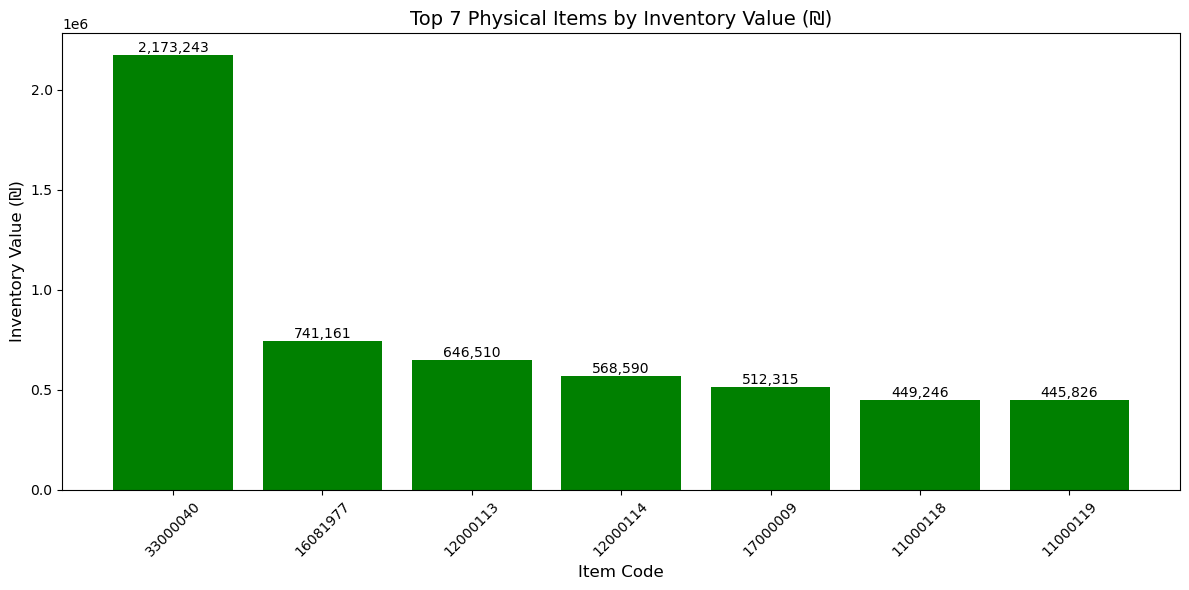

In [221]:
plt.figure(figsize=(12, 6))

bars = plt.bar(
    top_5_physical_items["◊û◊ß\"◊ò"].astype(str),
    top_5_physical_items["◊©◊ï◊ï◊ô ◊û◊ú◊ê◊ô (◊©\"◊ó)"],
    color='green'
)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.title("Top 7 Physical Items by Inventory Value (‚Ç™)", fontsize=14)
plt.xlabel("Item Code", fontsize=12)
plt.ylabel("Inventory Value (‚Ç™)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Inventory Summary ‚Äì Key Insights

###  Focus: High-Value Physical Inventory Items

After cleaning and analyzing the inventory data (excluding non-physical items like licenses or services), we identified the **top 7 physical items** with the **highest total inventory value** (‚Ç™). These items represent a **significant portion of the overall stock investment** and may indicate potential overstocking or slow turnover.

###  Key Observations:
- Each of the top 7 items has an inventory value exceeding **hundreds of thousands of shekels**, with the top item exceeding **‚Ç™2.1 million**.
- Some items have **very high quantities in stock** (e.g., over 20,000 units), suggesting the need to evaluate their actual consumption rate and demand.
- These items should be reviewed to assess:
  -  Whether current stock levels are justified
  -  If usage rate aligns with holding quantity
  -  Whether capital is tied up unnecessarily

###  Recommendation:
Conduct a deeper operational review for these items to determine:
- If inventory can be optimized
- Whether purchase planning and forecasting need adjustments
- If stock liquidation or reallocation should be considered

This will improve cash flow and reduce inventory holding costs.


# 5. Inventory Turnover Analysis ‚Äì Identifying Fast, Slow, and Dead Stock

## Objective
To analyze the movement of physical inventory items in order to:
- Identify top-moving vs. slow-moving items
- Detect dead stock (items with no movement)
- Optimize stock levels and reduce unnecessary holding costs
- Support procurement and clearance decisions

---

## What Was Measured

Each item was assessed using:
- **Total movement quantity** (sum of all withdrawals)
- **Number of withdrawal events**
- **Current stock and past usage**
- **Unit cost and total inventory value** (‚Ç™)

Combined, these allow us to assess not just stock levels, but the **efficiency of stock usage over time**.



In [222]:
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()
inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"] = pd.to_numeric(inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"], errors="coerce")
inventory_df["◊™◊ê◊®◊ô◊ö"] = pd.to_datetime(inventory_df["◊™◊ê◊®◊ô◊ö"], errors="coerce")

desc_df = inventory_df[["◊û◊ß\"◊ò", "◊™◊ê◊ï◊® ◊û◊ï◊¶◊®"]].drop_duplicates()

movement_summary = (
    inventory_df.groupby("◊û◊ß\"◊ò")["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"]
    .agg(◊û◊°◊§◊®_◊™◊†◊ï◊¢◊ï◊™="count", ◊°◊î◊õ_◊™◊ñ◊ï◊ñ◊î="sum")
    .reset_index()
)

abs_movement = inventory_df.groupby("◊û◊ß\"◊ò")["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"].apply(lambda x: x.abs().sum()).reset_index()
abs_movement = abs_movement.rename(columns={"◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú": "◊°◊î\"◊õ ◊™◊ñ◊ï◊ñ◊î ◊ê◊ë◊°◊ï◊ú◊ï◊ò◊ô◊™"})

movement_summary = movement_summary.merge(abs_movement, on="◊û◊ß\"◊ò", how="left")
movement_summary = movement_summary.merge(desc_df, on="◊û◊ß\"◊ò", how="left")

dead_stock = movement_summary[movement_summary["◊°◊î\"◊õ ◊™◊ñ◊ï◊ñ◊î ◊ê◊ë◊°◊ï◊ú◊ï◊ò◊ô◊™"] == 0].copy()

top_movers = movement_summary.sort_values("◊°◊î\"◊õ ◊™◊ñ◊ï◊ñ◊î ◊ê◊ë◊°◊ï◊ú◊ï◊ò◊ô◊™", ascending=False).head(10)

low_movers = movement_summary[
    movement_summary["◊°◊î\"◊õ ◊™◊ñ◊ï◊ñ◊î ◊ê◊ë◊°◊ï◊ú◊ï◊ò◊ô◊™"] > 0
].sort_values("◊°◊î\"◊õ ◊™◊ñ◊ï◊ñ◊î ◊ê◊ë◊°◊ï◊ú◊ï◊ò◊ô◊™", ascending=True).head(10)

print("üîù Top 10 Moving Items:")
display(top_movers)

print("üîª Bottom 10 Moving Items (excluding dead stock):")
display(low_movers)

print("üíÄ Dead Stock (No Movement):")
display(dead_stock.head(10))


üîù Top 10 Moving Items:


◊û◊ß"◊ò  ◊û◊°◊§◊®_◊™◊†◊ï◊¢◊ï◊™  ◊°◊î◊õ_◊™◊ñ◊ï◊ñ◊î  ◊°◊î"◊õ ◊™◊ñ◊ï◊ñ◊î ◊ê◊ë◊°◊ï◊ú◊ï◊ò◊ô◊™  \
2469  30000035           12    26070.0               26070.0   
515   17000330           15    23680.0               25980.0   
416   17000009           44    22255.0               22255.0   
425   17000028           56    17120.0               17120.0   
417   17000010           41    16560.0               16560.0   
424   17000026           32    15504.0               15504.0   
441   17000079           42    14770.0               14770.0   
414   17000006           34    13895.0               13895.0   
2189  25001334           36    11986.0               13036.0   
433   17000042           36    11475.0               11915.0   

                                     ◊™◊ê◊ï◊® ◊û◊ï◊¶◊®  
2469                   ◊ì◊°◊ß◊ô◊™ ◊©◊ò◊ï◊ó◊î 5/16X1.2X25  
515         ◊ó◊ï◊ò ◊í◊ú◊ê◊ô 14 AWG XPLE 0.6/1 KV 125C  
416                       22X1.5+1X2.5+1X4 ◊õ◊ë◊ú  
425                             ◊õ◊ë◊ú 5X1.5 XLPE  
417                       14X1.5+1X2.5+1X4 ◊õ◊ë◊ú  
424                   ◊õ◊ë◊ú ◊ò◊ï◊ï◊ô◊°◊ò◊ì 2X14  ◊ë◊ô◊ú◊ì◊ô◊ü  
441    ◊õ◊ë◊ú ◊î◊ê◊®◊ß◊î 25 ◊û◊û' ◊¶/' ◊ß◊©◊ô◊ó (◊ë◊™◊ï◊£ 500 ◊û')  
414                             ◊õ◊ë◊ú 3X1.5 N2XY  
2189                       ◊û◊î◊ì◊ß TB10-I 3246340  
433   ◊õ◊ë◊ú ◊î◊ê◊®◊ß◊î 10 ◊û''◊û ◊¶/◊ô ◊ß◊©◊ô◊ó (◊ë◊™◊ï◊£ 500 ◊û')

üîª Bottom 10 Moving Items (excluding dead stock):


◊û◊ß"◊ò  ◊û◊°◊§◊®_◊™◊†◊ï◊¢◊ï◊™  ◊°◊î◊õ_◊™◊ñ◊ï◊ñ◊î  ◊°◊î"◊õ ◊™◊ñ◊ï◊ñ◊î ◊ê◊ë◊°◊ï◊ú◊ï◊ò◊ô◊™  \
925   20000596            4        1.0                   1.0   
277   14000389            4        1.0                   1.0   
1101  22000816            1        1.0                   1.0   
676   19000318            1        1.0                   1.0   
1125  22000897            4        1.0                   1.0   
2319  26000459            1        1.0                   1.0   
2316  26000452            1        1.0                   1.0   
1144  22000985            4        1.0                   1.0   
1186  22001102            4        1.0                   1.0   
1194  22001175            4        1.0                   1.0   

                                              ◊™◊ê◊ï◊® ◊û◊ï◊¶◊®  
925                               ◊°◊ò ◊û◊ß◊ì◊ó◊ô◊ù SDS ◊ú◊§◊ò◊ô◊©◊ï◊ü  
277           ◊ë◊°◊ô◊° 1-1/4'' ◊ô◊°◊ï◊ì ◊ú◊¢◊û◊ï◊ì 12 ◊û' ◊û◊™◊ï◊û◊ü 50X50  
1101  ◊ñ◊®◊ï◊¢ ◊û◊ô◊í◊ï◊ü ◊ê◊ú◊ï◊û◊ô' GL 210 (◊û◊™◊õ◊™ ◊ß◊¶◊®◊î ◊û◊ô◊ï◊¢◊ì ◊ú-8 ...  
676                                      ◊û◊©◊ê◊ë◊î◊î◊ô◊ì◊®◊ê◊ï◊ú◊ô◊™  
1125     OMEGA ATM U354 ULTRA BOOM HOLDER P120062 00001  
2319                              ◊õ◊ë◊ú Display port ◊ú◊û◊°◊ö  
2316                  Fix SHELF 1100 depth (470mmX750mm  
1144  ◊¢◊û◊ï◊ì ◊ê◊†◊ò◊ô ◊ï◊†◊ì◊ú◊ô ◊ú◊û◊¶◊ú◊û◊™ LPR ◊í◊ï◊ë◊î 50 ◊°"◊û ◊©◊ó◊ï◊® (r...  
1186  NIGHT&DAY-8 NPB 320831 (◊û◊ó◊°◊ï◊ù 8 ◊û' ◊¶◊ë◊¢ ◊ê◊ú◊ï◊û◊ô◊†◊ô◊ï◊ù)  
1194  new DAKOTA 219-700  LIGHT-INOX WITH CDF 350100-OX

üíÄ Dead Stock (No Movement):


◊û◊ß"◊ò  ◊û◊°◊§◊®_◊™◊†◊ï◊¢◊ï◊™  ◊°◊î◊õ_◊™◊ñ◊ï◊ñ◊î  ◊°◊î"◊õ ◊™◊ñ◊ï◊ñ◊î ◊ê◊ë◊°◊ï◊ú◊ï◊ò◊ô◊™  \
8   10000004            3        0.0                   0.0   
10  10000006            3        0.0                   0.0   
11  10200001            3        0.0                   0.0   
13  10200005            3        0.0                   0.0   
14  10200008            3        0.0                   0.0   
15  10200009            3        0.0                   0.0   
16  10300002            3        0.0                   0.0   
17  10300003            3        0.0                   0.0   
18  10300004            3        0.0                   0.0   
20  10300006            3        0.0                   0.0   

                   ◊™◊ê◊ï◊® ◊û◊ï◊¶◊®  
8   ME-106       ◊õ◊®◊ò◊ô◊° ◊ñ◊õ◊®◊ï◊ü  
10  RIO-1024  ◊õ◊®◊ò◊ô◊° ◊û◊û◊°◊® ◊û◊ú◊ê  
11  CPU-386  ◊õ◊®◊ò◊ô◊° ◊ô◊¢"◊û ◊ú◊ë◊ß◊®  
13  PSU.   ◊õ◊®◊ò◊ô◊° ◊°◊§◊ß ◊õ◊ó ◊ú◊ë◊ß◊®  
14  S.MAP ◊õ◊®◊ò◊ô◊° ◊û◊§◊î ◊°◊ô◊†◊ï◊§◊ò◊ô◊™  
15  RIOA      ◊õ◊ï◊ú◊ú I/O ◊õ◊®◊ò◊ô◊°  
16               ATC 952 RIO  
17                ATC 952 LD  
18               ATC 952 CPU  
20   ATC 952 DISPLAY CONTROL


## Table & Chart Highlights

### 1. Top 10 Moving Items (High Activity)

![Top Moving Items](attachment:◊û◊°◊ß◊†◊î%205.png)

- Items such as:
  - `30000035` ‚Äì 26,070 units moved
  - `17000330` ‚Äì 23,680 units
  - `17000009` ‚Äì 22,255 units
- These items have frequent usage and high volume withdrawal, indicating:
  - Operational importance
  - Need for continuous replenishment
  - High consumption in projects or production

These items should be:
- Monitored for availability
- Prioritized in forecasting
- Considered for automated reordering

---

### 2. Bottom 10 Moving Items (Negligible Movement, but not Dead)

- Items like `20000596`, `14000389`, and `22000816` show only **1-4 withdrawal events** with minimal quantities.
- Although technically "used," they show:
  - Extremely low turnover
  - Potentially excessive inventory relative to usage
- These should be flagged for:
  - Usage review
  - Possible phase-out or consolidation
  - Avoidance in future procurement

---

### 3. Dead Stock (Zero Movement)

- Includes items like:
  - `10000004` ‚Äì No usage despite 3 units in stock
  - `10200001`, `10200006`, `10300002` ‚Äì Components or cards unused entirely
- All items in this list show:
  - **0 units moved**
  - Still sitting in warehouse for a long period
- These represent **100% idle capital** and **storage burden**

Such items should be:
- Evaluated for technical relevance (e.g. obsolete models)
- Reallocated, liquidated, or written off where appropriate

---

## Combined Insight

This analysis complements earlier findings (on quantity and value) by adding **turnover perspective**:
- A high-value item may be justified if it moves frequently.
- But a high-value item with no movement becomes a financial liability.
- Likewise, low-cost but high-movement items may deserve more stocking flexibility.

---

## Recommendations

- **Set turnover thresholds** to define when items are flagged as slow or dead.
- **Cross-check with inventory value** to prioritize financial impact.
- **Reevaluate procurement** rules for slow or non-moving items.
- **Create alerts** in inventory systems for items that haven‚Äôt moved over X months.
- **Engage engineering or planning teams** to confirm relevance of technical components (cards, connectors, obsolete parts).

## Key Insights

- A significant portion of the highest-moving items are **cables and wires**, indicating ongoing consumption likely driven by projects or installations.
- Some **high-cost items show low movement**, which raises the question of whether they are essential to keep in stock or should be ordered per need.
- Items identified as **dead stock** (no movement) represent tied-up capital and should be considered for **clearance, resale, or donation**.
- These insights can be cross-referenced with **inventory value** to detect where the company holds **financially stuck assets**.
---

## Business Summary

Not all inventory is equal.  
Fast-moving items require availability focus.  
Dead stock ties up capital and shelf space, impacting cash flow and operational agility.  
Ongoing inventory turnover analysis is essential for informed decision-making and warehouse efficiency.


# 6. Seasonality & Frequency ‚Äì Initial Insight

## Objective
To identify whether there are recurring seasonal patterns or frequency-based trends in inventory movements, supporting better procurement, stocking, and forecasting decisions.


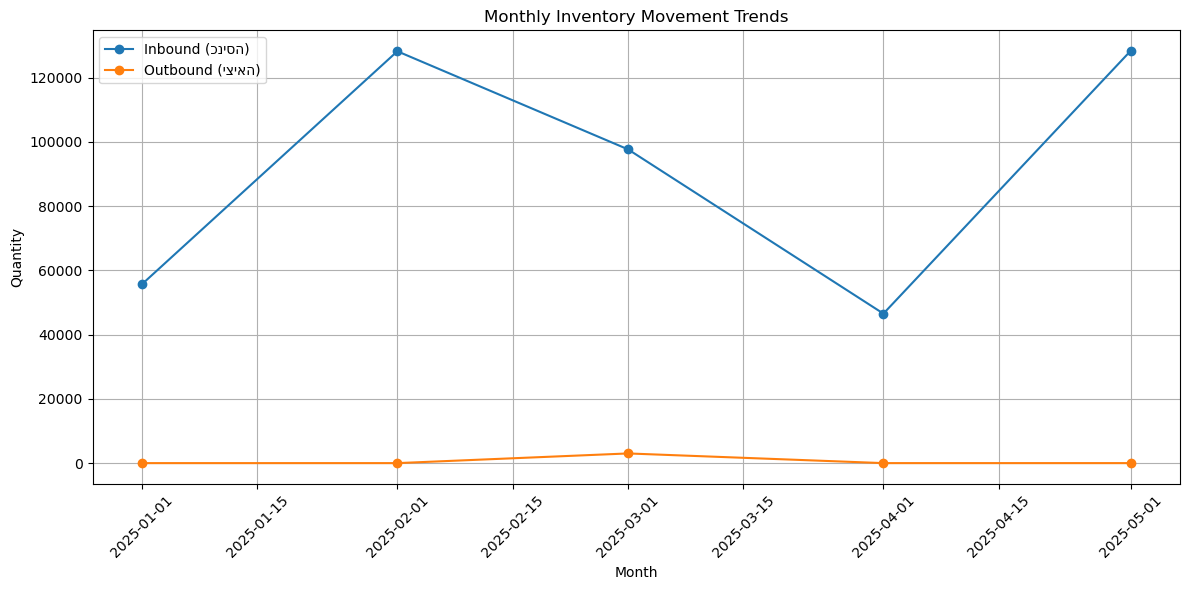

In [223]:
inventory_df["◊™◊ê◊®◊ô◊ö"] = pd.to_datetime(inventory_df["◊™◊ê◊®◊ô◊ö"], errors="coerce")

# ◊î◊ï◊°◊§◊™ ◊¢◊û◊ï◊ì◊™ ◊ó◊ï◊ì◊© (◊ú◊†◊ô◊™◊ï◊ó ◊ó◊ï◊ì◊©◊ô)
inventory_df["◊ó◊ï◊ì◊©"] = inventory_df["◊™◊ê◊®◊ô◊ö"].dt.to_period("M")

# ◊™◊†◊ï◊¢◊ï◊™ ◊ó◊ô◊ï◊ë◊ô◊ï◊™ = ◊õ◊†◊ô◊°◊ï◊™, ◊©◊ú◊ô◊ú◊ô◊ï◊™ = ◊ô◊¶◊ô◊ê◊ï◊™
inventory_df["◊õ◊ô◊ï◊ï◊ü"] = inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"].apply(lambda x: "◊õ◊†◊ô◊°◊î" if x > 0 else "◊ô◊¶◊ô◊ê◊î")

# ◊°◊õ◊ô◊û◊™ ◊õ◊û◊ï◊™ ◊ú◊§◊ô ◊ó◊ï◊ì◊© ◊ï◊õ◊ô◊ï◊ï◊ü
monthly_trend = inventory_df.groupby(["◊ó◊ï◊ì◊©", "◊õ◊ô◊ï◊ï◊ü"])["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"].sum().unstack().fillna(0)

# ◊î◊§◊ô◊õ◊™ ◊ê◊ô◊†◊ì◊ß◊° ◊ú◊™◊ê◊®◊ô◊õ◊ô◊ù ◊ú◊¶◊ï◊®◊ö ◊í◊®◊£
monthly_trend.index = monthly_trend.index.to_timestamp()

# ◊í◊®◊£ ◊ß◊ï◊ï◊ô◊ù
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend["◊õ◊†◊ô◊°◊î"], marker='o', label='Inbound (◊õ◊†◊ô◊°◊î)')
plt.plot(monthly_trend.index, monthly_trend["◊ô◊¶◊ô◊ê◊î"].abs(), marker='o', label='Outbound (◊ô◊¶◊ô◊ê◊î)')

plt.title("Monthly Inventory Movement Trends")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Inventory Seasonality & Frequency ‚Äì Summary

## Graph ‚Äì Monthly Inventory Movement Trends

### Observations from the Graph:
- **Inbound (blue line)**:  
  - Strong fluctuations are evident.  
  - Peaks occur in **February** (~128,000 units) and **May** (~129,000 units).  
  - A noticeable drop in **April** (~47,000 units).  
  - This suggests procurement occurs in **large, irregular cycles**, rather than a steady flow.
  
- **Outbound (orange line)**:  
  - Remains almost **flat and close to zero** across all months.  
  - Even during months of high inbound supply, outbound movement does not rise proportionally.  
  - This mismatch highlights possible **stockpiling** or **delayed consumption**.

---

## Key Insights
1. **Inbound volatility vs. stable outbound**  
   The company brings in large shipments irregularly, while usage remains consistently low.

2. **Potential overstocking**  
   Peaks in inbound not matched by outbound imply that items are being stored rather than consumed.

3. **Project-driven procurement**  
   The spikes may reflect preparation for specific projects, rather than steady demand.

---

## Limitations
- Data spans only **5 months (Jan‚ÄìMay 2025)** ‚Äì insufficient for detecting true seasonality.  
- No historical data available for comparison to prior years.  
- Consumption data may not fully reflect end-user demand if materials are sitting idle.

---

## Recommendations
- **Extend monitoring** into the second half of 2025 to validate whether spikes repeat.  
- **Investigate reasons** for February and May surges: project launches, supplier cycles, or contract-based deliveries.  
- **Cross-check with demand forecasts** ‚Äì ensure procurement aligns with actual project timelines.  
- Consider **smoothing procurement cycles** to reduce stockpiling and associated holding costs.

---

## Business Summary
The current pattern shows **large, irregular inbound spikes with minimal outbound movement**.  
This creates potential risks of **overstocking**, **cash flow lock-up**, and **inefficient planning**.  
With continued monitoring and better alignment to actual demand, procurement strategy can be significantly improved.


# 7. Supplier Performance Analysis

Evaluating supplier performance is critical for improving procurement reliability and optimizing supply chain operations. In this analysis, we assess supplier behavior based on **delivery frequency** and **consistency of delivered quantities**.


In [224]:
import pandas as pd

# ◊ß◊®◊ô◊ê◊î ◊ú◊ß◊ï◊ë◊¶◊ô ◊î◊û◊ú◊ê◊ô (◊ê◊ù ◊ò◊®◊ù ◊†◊¢◊©◊î)
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)

# ◊†◊ô◊ß◊ï◊ô ◊¢◊û◊ï◊ì◊ï◊™
inventory_df.columns = inventory_df.columns.str.strip()

# ◊î◊û◊®◊î ◊ú◊§◊ï◊®◊û◊ò◊ô◊ù ◊û◊™◊ê◊ô◊û◊ô◊ù
inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"] = pd.to_numeric(inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"], errors="coerce")
inventory_df["◊™◊ê◊®◊ô◊ö"] = pd.to_datetime(inventory_df["◊™◊ê◊®◊ô◊ö"], errors="coerce")

# ◊©◊ú◊ë: ◊°◊ô◊†◊ï◊ü ◊®◊ß ◊™◊†◊ï◊¢◊ï◊™ **◊õ◊†◊ô◊°◊î** ◊ú◊û◊ú◊ê◊ô (◊õ◊ú◊ï◊û◊® ◊ê◊°◊§◊ß◊ï◊™ ◊û◊°◊§◊ß)
inbound_df = inventory_df[
    (inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"] > 0) &
    (inventory_df["◊©◊ù ◊°◊§◊ß"].notna())
].copy()

# ◊†◊ô◊™◊ï◊ó ◊ú◊§◊ô ◊°◊§◊ß ‚Äì ◊û◊°◊§◊® ◊ê◊°◊§◊ß◊ï◊™, ◊°◊ö ◊î◊õ◊û◊ï◊™ ◊©◊°◊ï◊§◊ß◊î, ◊û◊û◊ï◊¶◊¢ ◊õ◊û◊ï◊™ ◊ú◊î◊ñ◊û◊†◊î
supplier_performance = (
    inbound_df.groupby("◊©◊ù ◊°◊§◊ß")
    .agg(
        ◊û◊°◊§◊®_◊ê◊°◊§◊ß◊ï◊™=("◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú", "count"),
        ◊°◊ö_◊õ◊û◊ï◊™_◊°◊ï◊§◊ß◊î=("◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú", "sum"),
        ◊û◊û◊ï◊¶◊¢_◊õ◊û◊ï◊™_◊ú◊ê◊°◊§◊ß◊î=("◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú", "mean"),
        ◊û◊°_◊ó◊ï◊ì◊©◊ô◊ù_◊§◊¢◊ô◊ú◊ô◊ù=("◊™◊ê◊®◊ô◊ö", lambda x: x.dt.month.nunique())
    )
    .reset_index()
)

# ◊ó◊ô◊©◊ï◊ë ◊û◊û◊ï◊¶◊¢ ◊ê◊°◊§◊ß◊ï◊™ ◊ú◊ó◊ï◊ì◊©
supplier_performance["◊ê◊°◊§◊ß◊ï◊™_◊ú◊ó◊ï◊ì◊©"] = (
    supplier_performance["◊û◊°◊§◊®_◊ê◊°◊§◊ß◊ï◊™"] / supplier_performance["◊û◊°_◊ó◊ï◊ì◊©◊ô◊ù_◊§◊¢◊ô◊ú◊ô◊ù"]
).round(1)

# ◊î◊¶◊í◊î
supplier_performance = supplier_performance.sort_values("◊û◊°◊§◊®_◊ê◊°◊§◊ß◊ï◊™", ascending=False)
supplier_performance.head(20)


◊©◊ù ◊°◊§◊ß  ◊û◊°◊§◊®_◊ê◊°◊§◊ß◊ï◊™  ◊°◊ö_◊õ◊û◊ï◊™_◊°◊ï◊§◊ß◊î  \
25                   ◊í.◊ë◊®◊° ◊©◊ô◊ï◊ï◊ß (1983) ◊ë◊¢"◊û          142        83691.0   
44                                  ◊ó◊í◊ô ◊ô◊®◊ï◊ü          103          848.0   
66                            ◊†.◊ó◊ü ◊ó◊©◊û◊ú ◊ë◊¢"◊û           98         5437.0   
8                     ◊ê◊ì◊ï◊ï◊ô◊° ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ë◊¢"◊û           91          214.0   
77                 ◊¢◊ï◊§◊® ◊©◊¢◊®◊ô◊ù ◊ê◊ï◊ò◊ï◊û◊ò◊ô◊ô◊ù ◊ë◊¢"◊û           85          199.0   
91  ◊©◊ô◊õ◊ï◊ü ◊ï◊ë◊ô◊†◊ï◊ô ◊°◊ï◊ú◊ú ◊ë◊ï◊†◊î-◊û◊†◊ï◊®◊î ◊û◊¢◊®◊õ◊ï◊™ ◊ë◊¢"◊û           84         3002.0   
19                                 ◊ê◊®◊õ◊î ◊ë◊¢"◊û           68        19367.0   
98           ◊™◊§◊ï◊ñ ◊ó◊©◊û◊ú ◊ê◊ú◊ß◊ò◊®◊ï◊†◊ô◊ß◊î ◊ï◊ë◊ß◊®◊î ◊ë◊¢"◊û           65         1151.0   
84                ◊ß◊û◊ó◊ô ◊õ◊ú◊ô ◊¢◊ë◊ï◊ì◊î (1994) ◊ë◊¢"◊û           64          767.0   
86                     ◊®◊ñ ◊¶.◊¶ ◊ò◊õ◊†◊ô 2003 ◊ë◊¢"◊û           54         1298.0   
29                        ◊ì◊í◊ü ◊û◊ï◊ú◊ò◊ô◊û◊ì◊ô◊î ◊ë◊¢"◊û           53         2123.0   
9                                ◊ê◊ì◊ô ◊§◊™◊®◊ï◊†◊ï◊™           42          172.0   
49                            ◊ò◊õ◊†◊ï-◊ë◊ï◊®◊í ◊ë◊¢"◊û           41        35226.0   
73                  ◊°◊ô◊°◊ê ◊ê◊ï◊ò◊ï◊û◊¶◊ô◊î ◊ë◊ô◊™◊ô◊™ ◊ë◊¢"◊û           40          321.0   
12                            ◊ê◊ï◊®◊ô◊ê◊ú ◊©◊ô ◊ë◊¢"◊û           35         5507.0   
60                   ◊û◊ò◊ú◊ê◊ï◊® (◊¢◊ô◊ü ◊ê◊ô◊ô◊ú◊î) ◊ë◊¢"◊û           31          329.0   
92                             ◊©◊ô◊® ◊§◊ú◊°◊ò ◊ë◊¢"◊û           27         1600.0   
57                                ◊ú◊ì◊ô◊ß◊ï ◊ë◊¢"◊û           27          213.0   
23                          ◊ë◊†◊ì◊ê ◊û◊í◊†◊ò◊ô◊ß ◊ë◊¢"◊û           24          265.0   
3                           Peek Traffic B.V           16          733.0   

    ◊û◊û◊ï◊¶◊¢_◊õ◊û◊ï◊™_◊ú◊ê◊°◊§◊ß◊î  ◊û◊°_◊ó◊ï◊ì◊©◊ô◊ù_◊§◊¢◊ô◊ú◊ô◊ù  ◊ê◊°◊§◊ß◊ï◊™_◊ú◊ó◊ï◊ì◊©  
25         589.373239                 5          28.4  
44           8.233010                 5          20.6  
66          55.479592                 5          19.6  
8            2.351648                 5          18.2  
77           2.341176                 5          17.0  
91          35.738095                 5          16.8  
19         284.808824                 5          13.6  
98          17.707692                 5          13.0  
84          11.984375                 4          16.0  
86          24.037037                 5          10.8  
29          40.056604                 5          10.6  
9            4.095238                 5           8.4  
49         859.170732                 5           8.2  
73           8.025000                 4          10.0  
12         157.342857                 5           7.0  
60          10.612903                 3          10.3  
92          59.259259                 5           5.4  
57           7.888889                 5           5.4  
23          11.041667                 5           4.8  
3           45.812500                 2           8.0

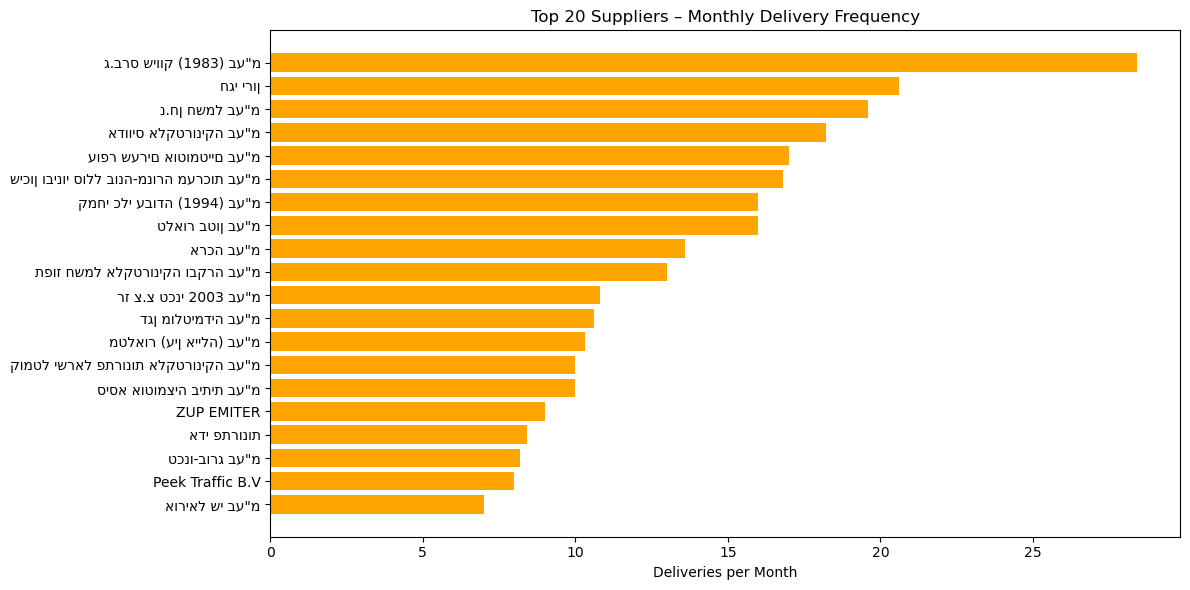

In [225]:
top_suppliers = supplier_performance.sort_values("◊ê◊°◊§◊ß◊ï◊™_◊ú◊ó◊ï◊ì◊©", ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_suppliers["◊©◊ù ◊°◊§◊ß"], top_suppliers["◊ê◊°◊§◊ß◊ï◊™_◊ú◊ó◊ï◊ì◊©"], color='orange')
plt.xlabel("Deliveries per Month")
plt.title("Top 20 Suppliers ‚Äì Monthly Delivery Frequency")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [226]:
delivery_df = inventory_df[inventory_df["◊°◊ï◊í ◊™◊†◊ï◊¢◊™ ◊û◊ú◊ê◊ô"] == "◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß"].copy()

delivery_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"] = pd.to_numeric(delivery_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"], errors="coerce")
delivery_df = delivery_df.dropna(subset=["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú", "◊©◊ù ◊°◊§◊ß"])

supplier_delivery_stats = (
    delivery_df.groupby("◊©◊ù ◊°◊§◊ß")["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"]
    .agg(["count", "sum", "mean", "std", "min", "max"])
    .rename(columns={
        "count": "◊û◊°◊§◊® ◊ê◊°◊§◊ß◊ï◊™",
        "sum": "◊°◊î◊¥◊õ ◊õ◊û◊ï◊™",
        "mean": "◊û◊û◊ï◊¶◊¢ ◊õ◊û◊ï◊™",
        "std": "◊°◊ò◊ô◊ô◊™ ◊™◊ß◊ü",
        "min": "◊õ◊û◊ï◊™ ◊û◊ô◊†◊ô◊û◊ú◊ô◊™",
        "max": "◊õ◊û◊ï◊™ ◊û◊ß◊°◊ô◊û◊ú◊ô◊™"
    })
    .sort_values("◊°◊î◊¥◊õ ◊õ◊û◊ï◊™", ascending=False)
)

supplier_delivery_stats = supplier_delivery_stats.round(2)

supplier_delivery_stats.head(10)


◊û◊°◊§◊® ◊ê◊°◊§◊ß◊ï◊™  ◊°◊î◊¥◊õ ◊õ◊û◊ï◊™  ◊û◊û◊ï◊¶◊¢ ◊õ◊û◊ï◊™  \
◊©◊ù ◊°◊§◊ß                                                                         
◊í.◊ë◊®◊° ◊©◊ô◊ï◊ï◊ß (1983) ◊ë◊¢"◊û                           142    83691.0      589.37   
◊ò◊õ◊†◊ï-◊ë◊ï◊®◊í ◊ë◊¢"◊û                                     41    35226.0      859.17   
◊ê◊®◊õ◊î ◊ë◊¢"◊û                                          69    19367.0      280.68   
◊§◊†◊ô◊ß◊° ◊ß◊ï◊†◊ò◊ß◊° ( ◊ô◊©◊®◊ê◊ú) ◊ë◊¢"◊û                          8    11910.0     1488.75   
◊ê◊ï◊®◊ô◊ê◊ú ◊©◊ô ◊ë◊¢"◊û                                     35     5507.0      157.34   
◊†.◊ó◊ü ◊ó◊©◊û◊ú ◊ë◊¢"◊û                                     99     5437.0       54.92   
◊©◊ô◊õ◊ï◊ü ◊ï◊ë◊ô◊†◊ï◊ô ◊°◊ï◊ú◊ú ◊ë◊ï◊†◊î-◊û◊†◊ï◊®◊î ◊û◊¢◊®◊õ◊ï◊™ ◊ë◊¢"◊û           84     3002.0       35.74   
ZUP EMITER                                          9     2303.0      255.89   
◊©◊ô ◊§◊ô◊ô◊ë◊® ◊ë◊¢"◊û                                       4     2225.0      556.25   
◊ì◊í◊ü ◊û◊ï◊ú◊ò◊ô◊û◊ì◊ô◊î ◊ë◊¢"◊û                                 53     2123.0       40.06   

                                          ◊°◊ò◊ô◊ô◊™ ◊™◊ß◊ü  ◊õ◊û◊ï◊™ ◊û◊ô◊†◊ô◊û◊ú◊ô◊™  \
◊©◊ù ◊°◊§◊ß                                                               
◊í.◊ë◊®◊° ◊©◊ô◊ï◊ï◊ß (1983) ◊ë◊¢"◊û                     1125.40            4.0   
◊ò◊õ◊†◊ï-◊ë◊ï◊®◊í ◊ë◊¢"◊û                              1870.34            1.0   
◊ê◊®◊õ◊î ◊ë◊¢"◊û                                    420.74            0.0   
◊§◊†◊ô◊ß◊° ◊ß◊ï◊†◊ò◊ß◊° ( ◊ô◊©◊®◊ê◊ú) ◊ë◊¢"◊û                  2067.58           10.0   
◊ê◊ï◊®◊ô◊ê◊ú ◊©◊ô ◊ë◊¢"◊û                               234.93            1.0   
◊†.◊ó◊ü ◊ó◊©◊û◊ú ◊ë◊¢"◊û                                85.45            0.0   
◊©◊ô◊õ◊ï◊ü ◊ï◊ë◊ô◊†◊ï◊ô ◊°◊ï◊ú◊ú ◊ë◊ï◊†◊î-◊û◊†◊ï◊®◊î ◊û◊¢◊®◊õ◊ï◊™ ◊ë◊¢"◊û      76.52            1.0   
ZUP EMITER                                   293.83            3.0   
◊©◊ô ◊§◊ô◊ô◊ë◊® ◊ë◊¢"◊û                                514.93          175.0   
◊ì◊í◊ü ◊û◊ï◊ú◊ò◊ô◊û◊ì◊ô◊î ◊ë◊¢"◊û                            78.70            2.0   

                                          ◊õ◊û◊ï◊™ ◊û◊ß◊°◊ô◊û◊ú◊ô◊™  
◊©◊ù ◊°◊§◊ß                                                   
◊í.◊ë◊®◊° ◊©◊ô◊ï◊ï◊ß (1983) ◊ë◊¢"◊û                         12200.0  
◊ò◊õ◊†◊ï-◊ë◊ï◊®◊í ◊ë◊¢"◊û                                  10000.0  
◊ê◊®◊õ◊î ◊ë◊¢"◊û                                        2000.0  
◊§◊†◊ô◊ß◊° ◊ß◊ï◊†◊ò◊ß◊° ( ◊ô◊©◊®◊ê◊ú) ◊ë◊¢"◊û                       5000.0  
◊ê◊ï◊®◊ô◊ê◊ú ◊©◊ô ◊ë◊¢"◊û                                   1000.0  
◊†.◊ó◊ü ◊ó◊©◊û◊ú ◊ë◊¢"◊û                                    500.0  
◊©◊ô◊õ◊ï◊ü ◊ï◊ë◊ô◊†◊ï◊ô ◊°◊ï◊ú◊ú ◊ë◊ï◊†◊î-◊û◊†◊ï◊®◊î ◊û◊¢◊®◊õ◊ï◊™ ◊ë◊¢"◊û          520.0  
ZUP EMITER                                        700.0  
◊©◊ô ◊§◊ô◊ô◊ë◊® ◊ë◊¢"◊û                                    1300.0  
◊ì◊í◊ü ◊û◊ï◊ú◊ò◊ô◊û◊ì◊ô◊î ◊ë◊¢"◊û                                500.0

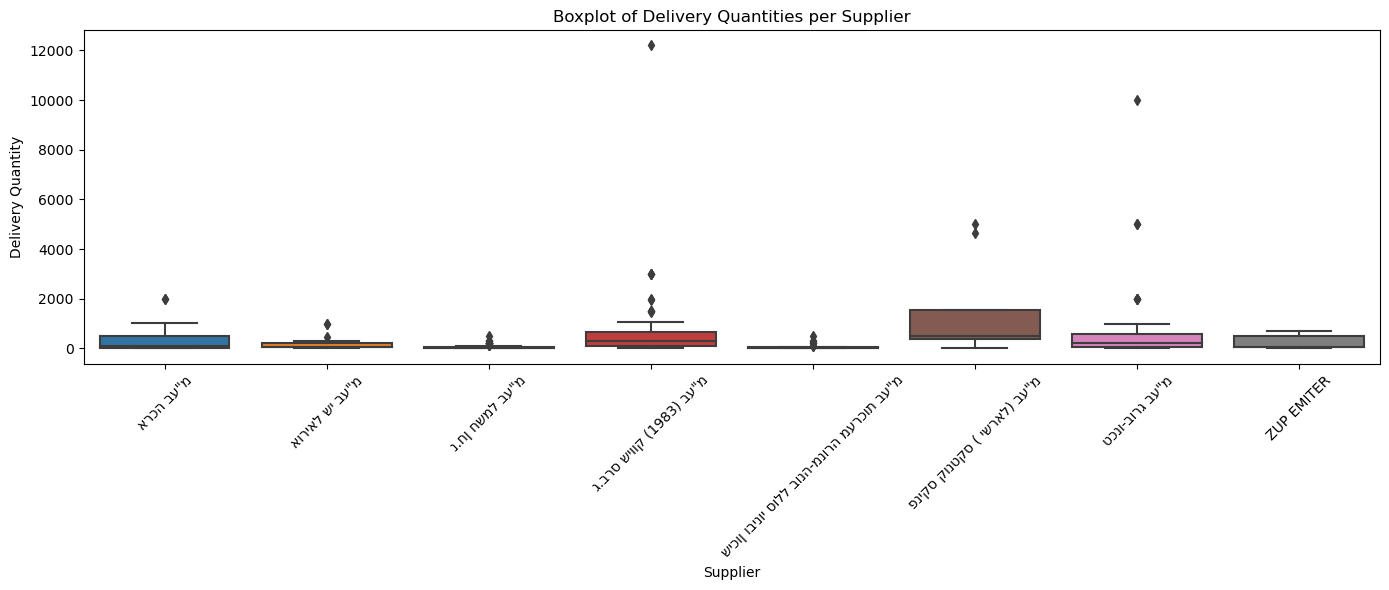

In [227]:
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()
inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"] = pd.to_numeric(inventory_df["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"], errors="coerce")

supplier_deliveries = inventory_df[inventory_df["◊°◊ï◊í ◊™◊†◊ï◊¢◊™ ◊û◊ú◊ê◊ô"] == "◊ß◊ë◊ú◊ï◊™ ◊°◊ó◊ï◊®◊î ◊û◊°◊§◊ß"]

top_suppliers_list = supplier_deliveries.groupby('◊©◊ù ◊°◊§◊ß')["◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú"].sum().nlargest(8).index
top_suppliers_data = supplier_deliveries[supplier_deliveries["◊©◊ù ◊°◊§◊ß"].isin(top_suppliers_list)].copy()

plt.figure(figsize=(14, 6))
sns.boxplot(data=top_suppliers_data, x="◊©◊ù ◊°◊§◊ß", y="◊õ◊û◊ï◊™ ◊û◊§◊¢◊ú")
plt.title("Boxplot of Delivery Quantities per Supplier")
plt.xlabel("Supplier")
plt.ylabel("Delivery Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Delivery Frequency by Supplier

The first bar chart shows the **Top 20 suppliers ranked by average monthly delivery frequency**.  
- A few suppliers, such as **Supplier ‚Äú◊ß◊ï◊ô◊© ◊°◊®.◊í (1983)‚Äù**, deliver significantly more frequently (over 25 deliveries per month), making them highly active and central to operations.  
- Most other suppliers fall within the range of **8‚Äì18 deliveries per month**, highlighting a more moderate activity level.  
- These differences suggest varying levels of dependency on specific suppliers. Suppliers with higher frequency are more critical but also represent greater risk if issues arise.

---

## Delivery Consistency by Supplier

The second graph (boxplot) illustrates the **distribution and variability of delivery quantities** per supplier.  
- **Stable Suppliers**: Some suppliers, such as **ZUP EMITER** and **M.◊¢◊ë ◊ú◊©◊î ◊ï◊ó.◊í**, show **narrow interquartile ranges (IQRs)** and few outliers. This indicates consistent delivery sizes and predictable patterns, which are beneficial for inventory planning.  
- **Unstable Suppliers**: Others, such as **◊ß◊ï◊ô◊© ◊°◊®.◊í (1983)** and **◊û.◊¢◊ë ◊í◊®◊ï◊ë-◊ï◊†◊°◊ò**, show **wide variability and extreme outliers**, with deliveries ranging from very small to very large. This inconsistency can complicate forecasting and may signal weak coordination or irregular demand cycles.  

The presence of **outliers** in some suppliers suggests occasional large shipments, potentially tied to **project-based orders** or emergency procurement rather than standard replenishment.

---

## Conclusions

1. Suppliers with **high frequency and stability** are strategic partners that enable smooth supply operations.  
2. Suppliers with **high variability** present risks of overstocking, stockouts, or planning inefficiencies.  
3. Frequent but inconsistent suppliers may need **closer monitoring and stricter coordination**.  

---

## Recommendations

- **Strengthen collaboration** with stable suppliers to lock in reliability and possibly negotiate better terms.  
- For suppliers with unstable delivery patterns, establish **forecasting agreements or order guidelines** to reduce variability.  
- Conduct **root-cause analysis** of extreme outliers to determine whether they are caused by poor planning, special projects, or supplier-side constraints.  
- Diversify sourcing where possible to reduce reliance on a small number of high-frequency but unstable suppliers.  

<div align="center">
  <img src="https://raw.githubusercontent.com/NirAvrahamoff/ysb-operations-analysis/main/ChatGPT%20Image%20Aug%2017%2C%202025%2C%2007_06_49%20PM.png" width="600"/>
</div>